#Comprehensive Exploratory Data Analysis (EDA) Report

#Introduction
In this report, we will conduct a detailed Exploratory Data Analysis (EDA) on the provided dataset. The analysis will involve preprocessing steps, visualization techniques, and key insights derived from the dataset. The primary goal is to gain a deep understanding of the dataset's characteristics, identify patterns, and draw meaningful conclusions.

#Dataset Overview
#Dataset Source:
The dataset is assumed to be stored in a DataFrame named cleaned_data.
Features: The dataset consists of various features, including both continuous and categorical variables.

#Preprocessing Steps

#Importing Libraries:

-Imported essential libraries such as pandas, numpy, seaborn, and matplotlib.pyplot for data manipulation and visualization.
We also imported preprocessing tools like PowerTransformer and RobustScaler from sklearn.preprocessing.

#Defining Continuous Features:

-Listed down the names of continuous features (continuous_features) based on the dataset.

#Transformation and Outlier Removal Function:

-Defined a function apply_transformations_and_plot to handle transformation and outlier removal for each continuous feature.
This function plots histograms before and after transformations, applies appropriate transformations (e.g., log or square root), and identifies outliers using RobustScaler.

#Iterating Over Continuous Features:

-Looped through each continuous feature in continuous_features and applied the apply_transformations_and_plot function.
This step ensured that each continuous feature was visualized and processed appropriately.
Exploratory Data Analysis (EDA) Steps

#Correlation Analysis:

-Calculated correlations between features using methods such as Pearson correlation, correlation ratio, and Cramer's Phi.
The correlation values were visualized using a heatmap to identify strong relationships between variables.

#Distribution Analysis:

-Analyzed the distributions of continuous features by plotting histograms and density plots.
Transformation techniques were applied to normalize skewed data and improve distribution characteristics.

#Categorical Feature Analysis:

-Bar charts were used to visualize the distribution of categorical features.
This step provided insights into the frequency of different categories within each feature.

#Outlier Detection and Removal:

-Outliers were detected using robust scaling (RobustScaler) and filtered out based on scaled values.
Histograms were plotted after outlier removal to assess the impact on feature distributions.

#Key Takeaways and Insights

#Feature Correlations:

-Strong correlations were observed between certain features, indicating potential relationships.
This information can guide feature selection and modeling strategies.
Distribution Characteristics:

-Skewed distributions were normalized using appropriate transformations (e.g., log or square root).
The transformed data showed improved symmetry and reduced skewness.
Outlier Identification:

-Outliers were effectively identified and removed using robust scaling techniques.
This step helped in cleaning the dataset and improving the quality of data analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy import stats

In [ ]:
# Load datasets
data1 = pd.read_csv("Test1_1.csv")
data2 = pd.read_csv("Test1_2.csv")
data3 = pd.read_csv("Test1_3.csv")

In [ ]:
# Display the first few rows of each dataset
print("Data1:")
print(data1.head(14))
print("Shape:", data1.shape)
print()


Data1:
   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America
Shape: (14, 2)



In [ ]:
print("Data2:")
print(data2.head(300))
print("Shape:", data2.shape)
print()


Data2:
    IATA_CODE                              AIRPORT              CITY STATE  \
0         ABE  Lehigh Valley International Airport         Allentown    PA   
1         ABI             Abilene Regional Airport           Abilene    TX   
2         ABQ    Albuquerque International Sunport       Albuquerque    NM   
3         ABR            Aberdeen Regional Airport          Aberdeen    SD   
4         ABY   Southwest Georgia Regional Airport            Albany    GA   
..        ...                                  ...               ...   ...   
295       STT                Cyril E. King Airport  Charlotte Amalie    VI   
296       STX             Henry E. Rohlsen Airport     Christiansted    VI   
297       SUN            Friedman Memorial Airport            Hailey    ID   
298       SUX                Sioux Gateway Airport        Sioux City    IA   
299       SWF        Stewart International Airport          Newburgh    NY   

    COUNTRY  LATITUDE  LONGITUDE  
0       USA  40.65236

In [ ]:
print("Data3:")
print(data3.head(1100))
print("Shape:", data3.shape)
print()


Data3:
      YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0     2015      1    1          4.0      AS           98.0      N407AS   
1     2015      1    1          4.0      AA         2336.0      N3KUAA   
2     2015      1    1          4.0      US          840.0      N171US   
3     2015      1    1          4.0      AA          258.0      N3HYAA   
4     2015      1    1          4.0      AS          135.0      N527AS   
...    ...    ...  ...          ...     ...            ...         ...   
1095  2015      1    1          4.0      AA         1133.0      N3FJAA   
1096  2015      1    1          4.0      AA         1254.0      N3JFAA   
1097  2015      1    1          4.0      AA         1403.0      N3GDAA   
1098  2015      1    1          4.0      AA         1412.0      N547AA   
1099  2015      1    1          4.0      AA         1159.0      N471AA   

     ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0               ANC                

In [ ]:
# Merge data1 (airline information) with data3 (flight information) based on 'AIRLINE'
merged_data = pd.merge(data1, data3, how='outer', on='AIRLINE')

# Merge the resulting DataFrame with data2 (airport information) based on 'AIRPORT'
merged_data = pd.merge(merged_data, data2, how='outer', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

# Display the first few rows of the merged DataFrame
print(merged_data.head(100))

# Display the shape of the merged DataFrame
print("Shape of merged data:", merged_data.shape)


   IATA_CODE_x                 AIRLINE    YEAR  MONTH  DAY  DAY_OF_WEEK  \
0           UA   United Air Lines Inc.     NaN    NaN  NaN          NaN   
1           AA  American Airlines Inc.     NaN    NaN  NaN          NaN   
2           US         US Airways Inc.     NaN    NaN  NaN          NaN   
3           F9  Frontier Airlines Inc.     NaN    NaN  NaN          NaN   
4           B6         JetBlue Airways     NaN    NaN  NaN          NaN   
..         ...                     ...     ...    ...  ...          ...   
95         NaN                      AS  2015.0    1.0  3.0          6.0   
96         NaN                      AS  2015.0    1.0  3.0          6.0   
97         NaN                      AS  2015.0    1.0  3.0          6.0   
98         NaN                      AS  2015.0    1.0  3.0          6.0   
99         NaN                      AS  2015.0    1.0  3.0          6.0   

    FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  \
0             NaN         

In [ ]:
# Check for duplicate rows in the DataFrame
duplicate_rows = merged_data.duplicated()

# Display duplicate rows
print("Duplicate Rows:")
print(merged_data[duplicate_rows])

# Drop duplicate rows from the DataFrame
cleaned_data = merged_data.drop_duplicates()

# Display the shape of the cleaned DataFrame after dropping duplicates
print("Shape after dropping duplicates:", cleaned_data.shape)


Duplicate Rows:
Empty DataFrame
Columns: [IATA_CODE_x, AIRLINE, YEAR, MONTH, DAY, DAY_OF_WEEK, FLIGHT_NUMBER, TAIL_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY, TAXI_OUT, WHEELS_OFF, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, WHEELS_ON, TAXI_IN, SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY, DIVERTED, CANCELLED, CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY, IATA_CODE_y, AIRPORT, CITY, STATE, COUNTRY, LATITUDE, LONGITUDE]
Index: []

[0 rows x 39 columns]
Shape after dropping duplicates: (103473, 39)


In [ ]:
# Check for missing values in the DataFrame
missing_values = merged_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / len(merged_data)) * 100
print("\nPercentage of Missing Values:\n", percentage_missing)

# Identify columns with more than 75% missing values for potential deletion
columns_to_drop = percentage_missing[percentage_missing > 75].index.tolist()
print("\nColumns to Drop (with more than 75% missing values):\n", columns_to_drop)


Missing Values:
 IATA_CODE_x            103459
AIRLINE                    11
YEAR                       24
MONTH                      24
DAY                        24
DAY_OF_WEEK                25
FLIGHT_NUMBER              25
TAIL_NUMBER               197
ORIGIN_AIRPORT             25
DESTINATION_AIRPORT        25
SCHEDULED_DEPARTURE        25
DEPARTURE_TIME           2379
DEPARTURE_DELAY          2379
TAXI_OUT                 2453
WHEELS_OFF               2453
SCHEDULED_TIME             25
ELAPSED_TIME             2705
AIR_TIME                 2705
DISTANCE                   25
WHEELS_ON                2530
TAXI_IN                  2530
SCHEDULED_ARRIVAL          25
ARRIVAL_TIME             2530
ARRIVAL_DELAY            2705
DIVERTED                   25
CANCELLED                  25
CANCELLATION_REASON    101024
AIR_SYSTEM_DELAY        67837
SECURITY_DELAY          67837
AIRLINE_DELAY           67837
LATE_AIRCRAFT_DELAY     67837
WEATHER_DELAY           67837
IATA_CODE_y            

In [ ]:
# Drop columns with more than 75% missing values
cleaned_data = merged_data.drop(columns=['IATA_CODE_x', 'CANCELLATION_REASON'])

# Display the shape of the cleaned dataset after dropping columns
print("Shape after dropping columns:", cleaned_data.shape)

# Check remaining missing values in the cleaned dataset
remaining_missing_values = cleaned_data.isnull().sum()
print("\nRemaining Missing Values:\n", remaining_missing_values)

Shape after dropping columns: (103473, 37)

Remaining Missing Values:
 AIRLINE                   11
YEAR                      24
MONTH                     24
DAY                       24
DAY_OF_WEEK               25
FLIGHT_NUMBER             25
TAIL_NUMBER              197
ORIGIN_AIRPORT            25
DESTINATION_AIRPORT       25
SCHEDULED_DEPARTURE       25
DEPARTURE_TIME          2379
DEPARTURE_DELAY         2379
TAXI_OUT                2453
WHEELS_OFF              2453
SCHEDULED_TIME            25
ELAPSED_TIME            2705
AIR_TIME                2705
DISTANCE                  25
WHEELS_ON               2530
TAXI_IN                 2530
SCHEDULED_ARRIVAL         25
ARRIVAL_TIME            2530
ARRIVAL_DELAY           2705
DIVERTED                  25
CANCELLED                 25
AIR_SYSTEM_DELAY       67837
SECURITY_DELAY         67837
AIRLINE_DELAY          67837
LATE_AIRCRAFT_DELAY    67837
WEATHER_DELAY          67837
IATA_CODE_y               15
AIRPORT                   15
C

In [ ]:
# Impute missing values in numerical columns with median or mode
numerical_columns = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
                     'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
                     'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
                     'LATITUDE', 'LONGITUDE']

for col in numerical_columns:
    if cleaned_data[col].dtype == np.float64 or cleaned_data[col].dtype == np.int64:
        # Impute missing numerical values with median
        cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].median())

In [ ]:
# Impute missing values in categorical columns with mode
categorical_columns = ['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DIVERTED',
                        'CANCELLED', 'IATA_CODE_y', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY']

for col in categorical_columns:
    if cleaned_data[col].dtype == object:  # Check if column is categorical
        # Impute missing categorical values with mode
        cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].mode()[0])

In [ ]:
# Check remaining missing values after imputation
remaining_missing_values_after_imputation = cleaned_data.isnull().sum()
print("\nRemaining Missing Values after Imputation:\n", remaining_missing_values_after_imputation)


Remaining Missing Values after Imputation:
 AIRLINE                    0
YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE       25
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
WHEELS_ON                  0
TAXI_IN                    0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
DIVERTED                  25
CANCELLED                 25
AIR_SYSTEM_DELAY       67837
SECURITY_DELAY         67837
AIRLINE_DELAY          67837
LATE_AIRCRAFT_DELAY    67837
WEATHER_DELAY          67837
IATA_CODE_y                0
AIRPORT                    0
CITY                       

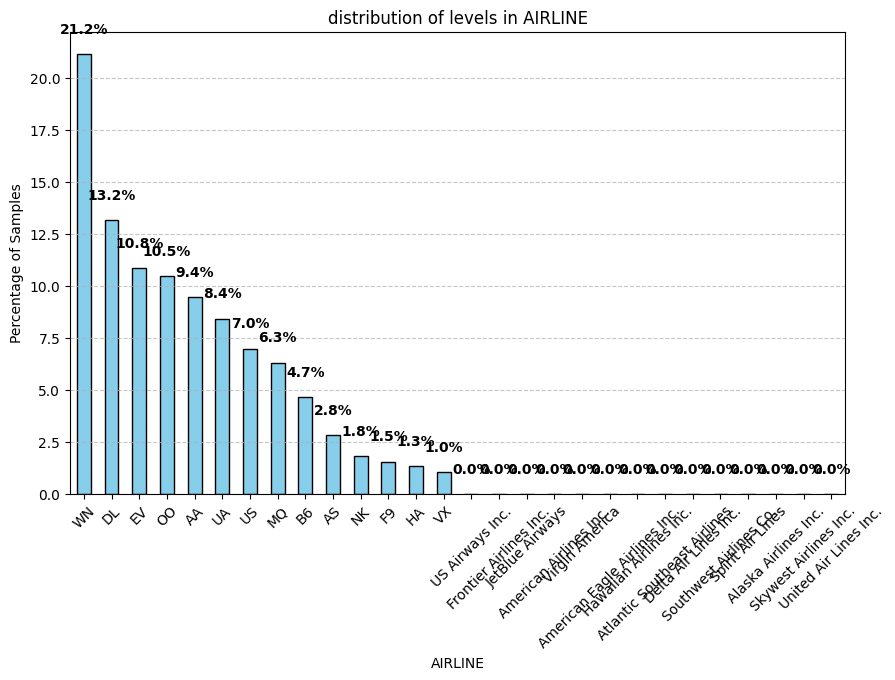

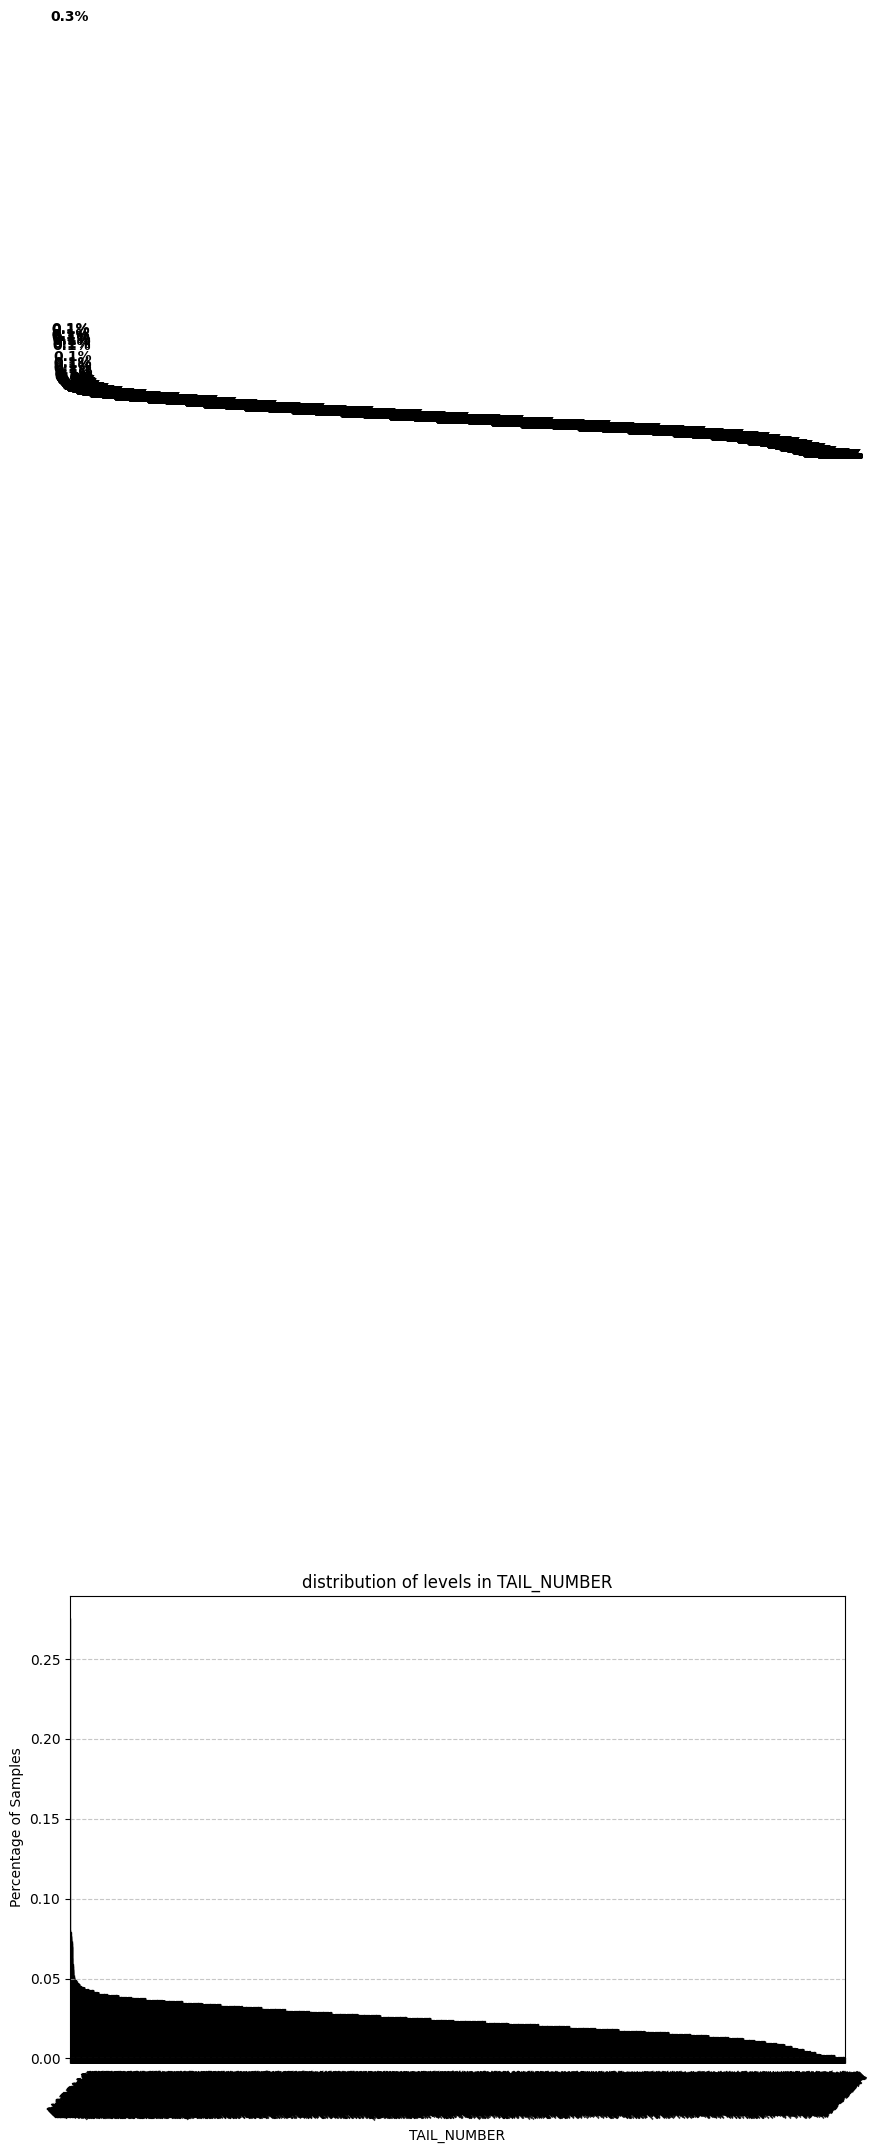

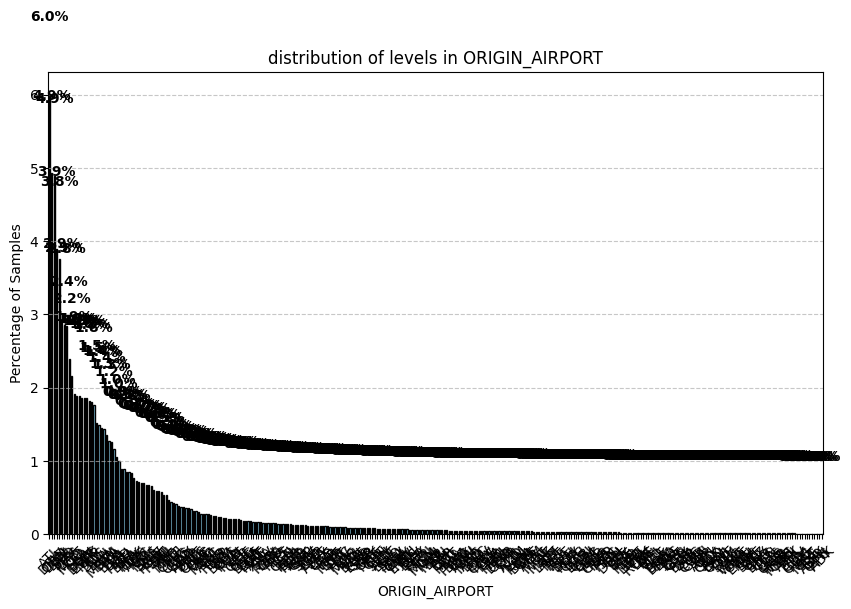

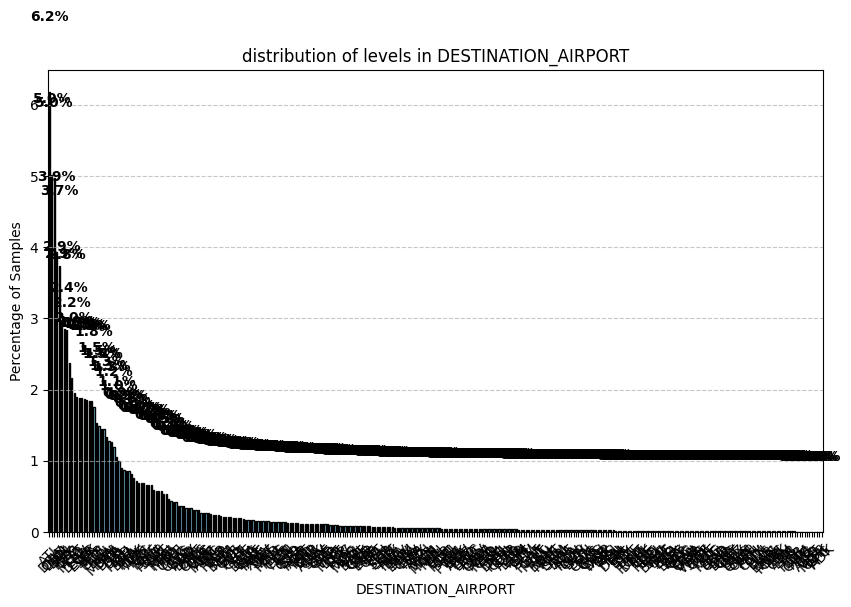

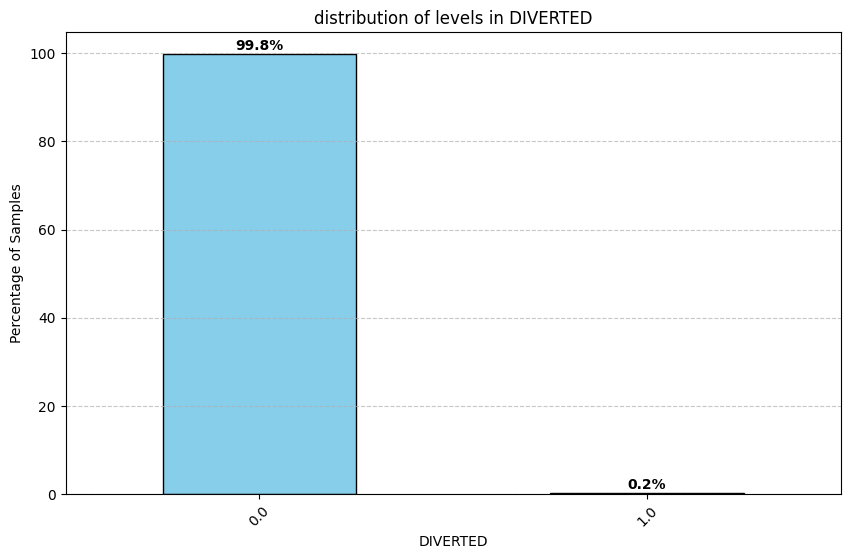

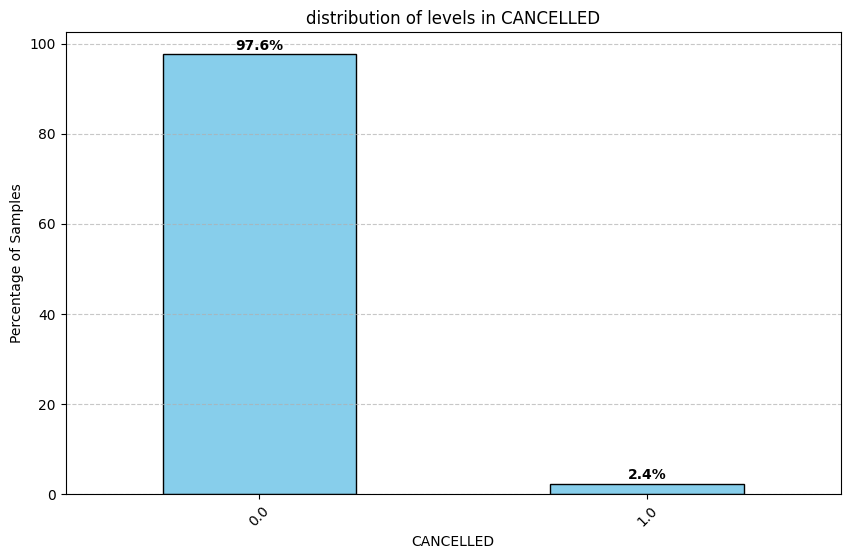

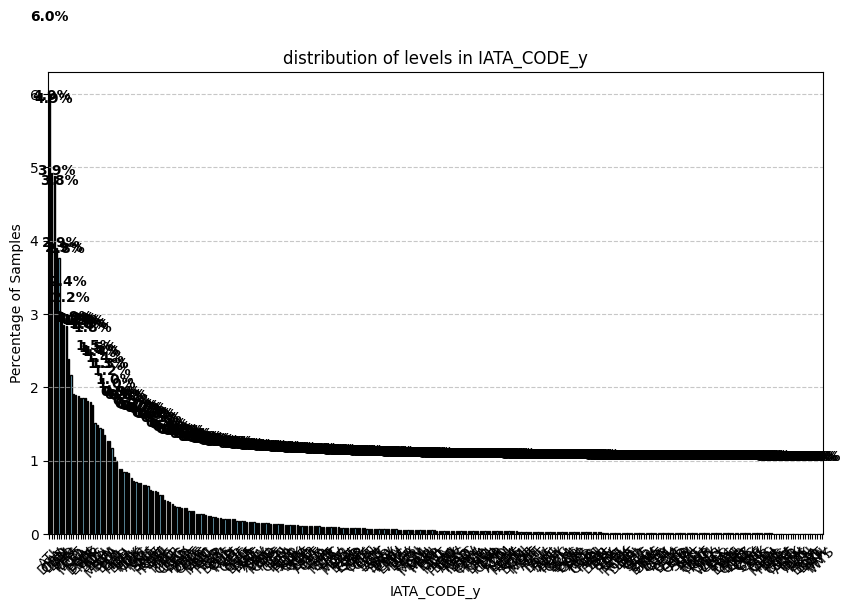

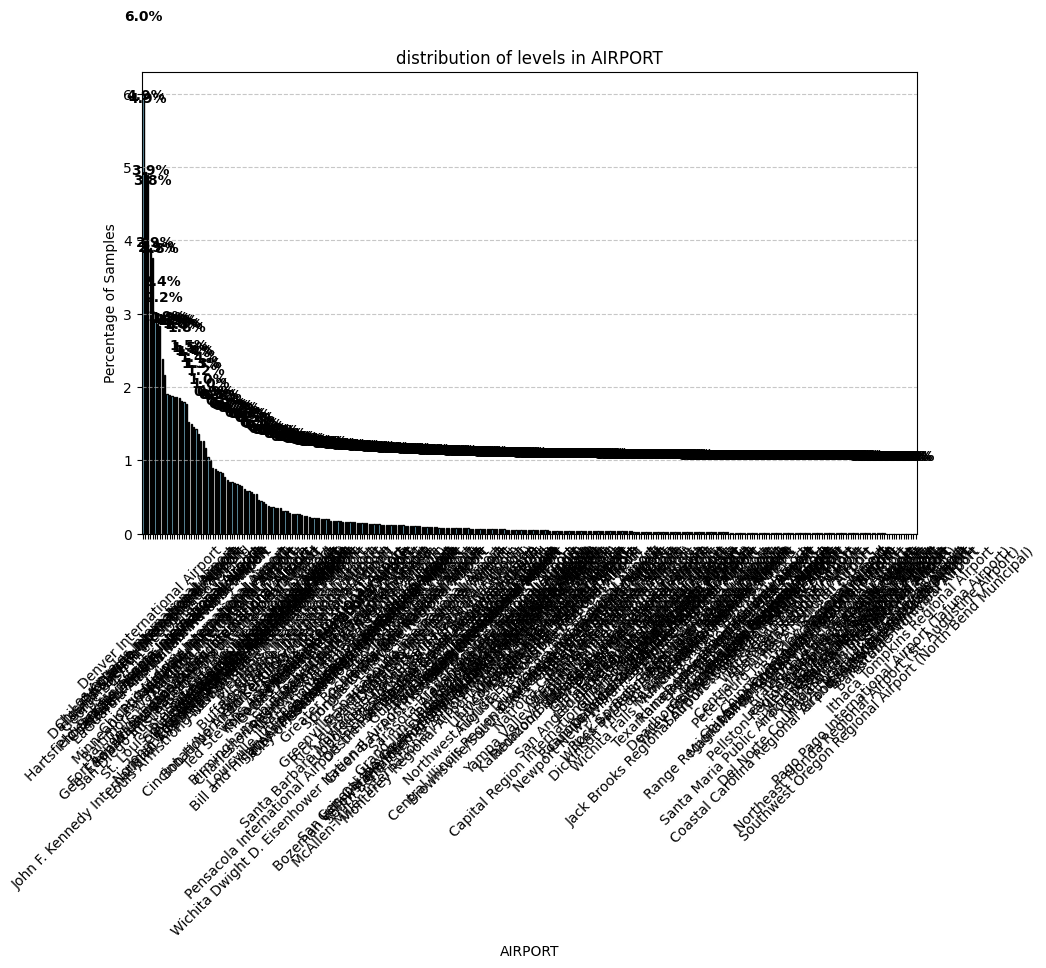

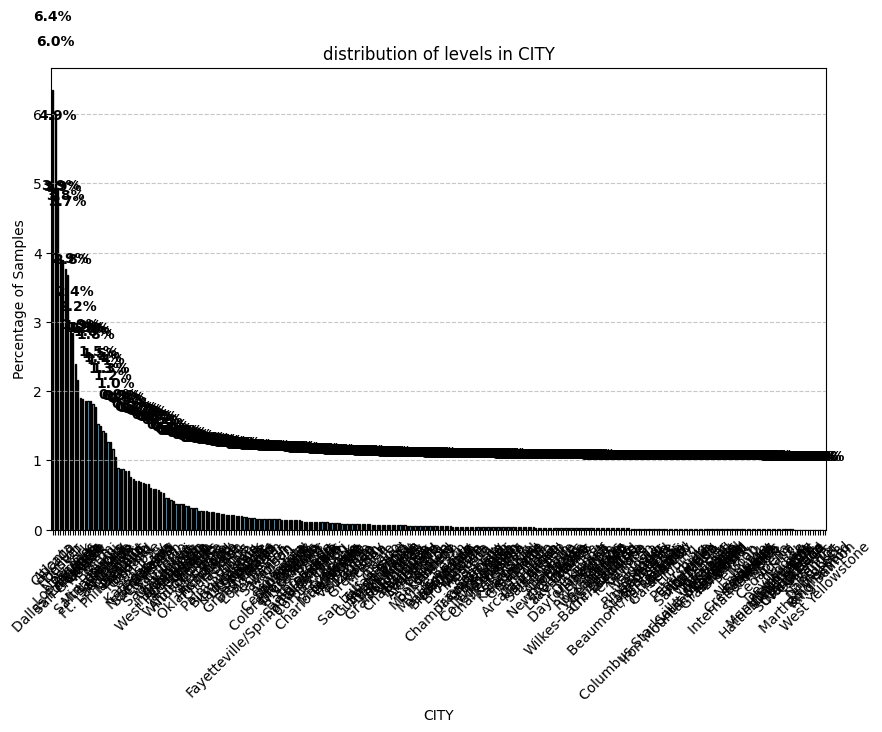

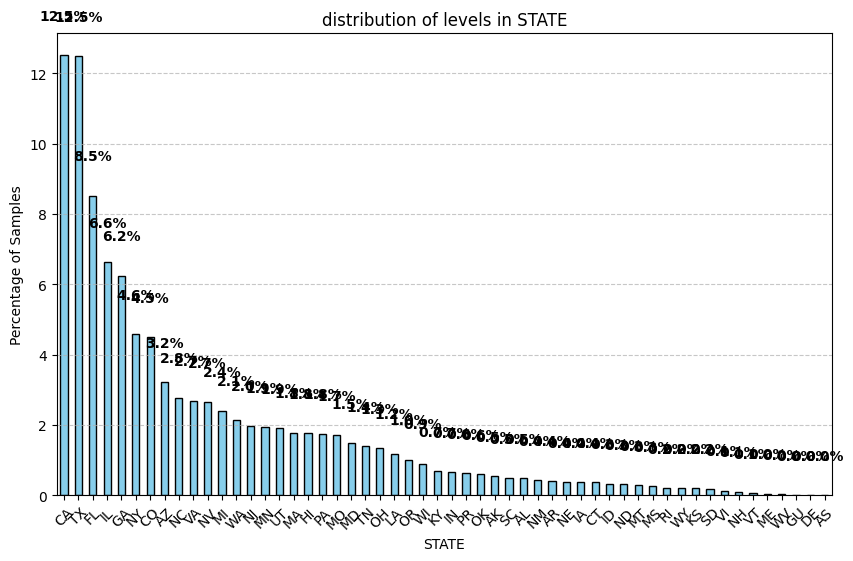

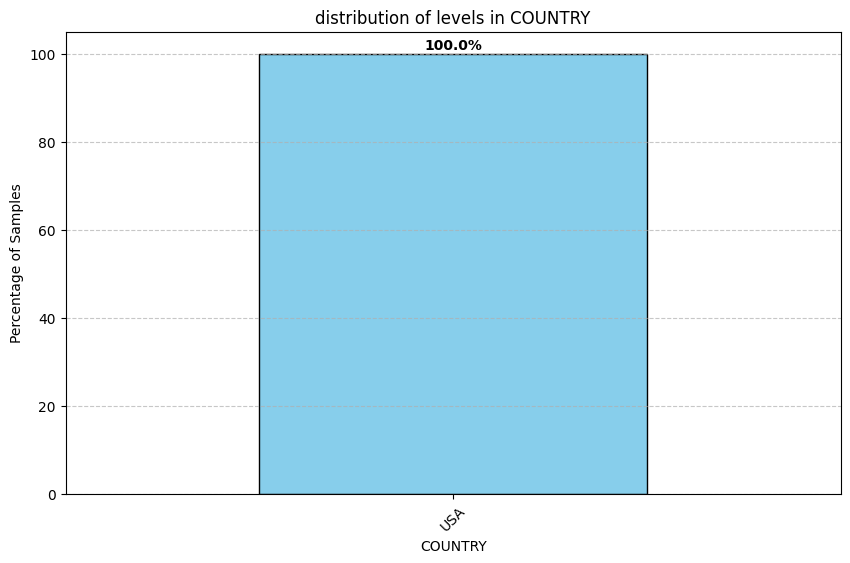

In [ ]:
# Plotting imbalance for each categorical feature
for col in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Calculate value counts and percentages
    value_counts = cleaned_data[col].value_counts(normalize=True) * 100

    # Plotting the bar chart
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    # Adding plot labels and title
    plt.title(f'distribution of levels in {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage of Samples')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Annotate each bar with the percentage value
    for i, v in enumerate(value_counts):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center', color='black', fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for reference
    plt.show()

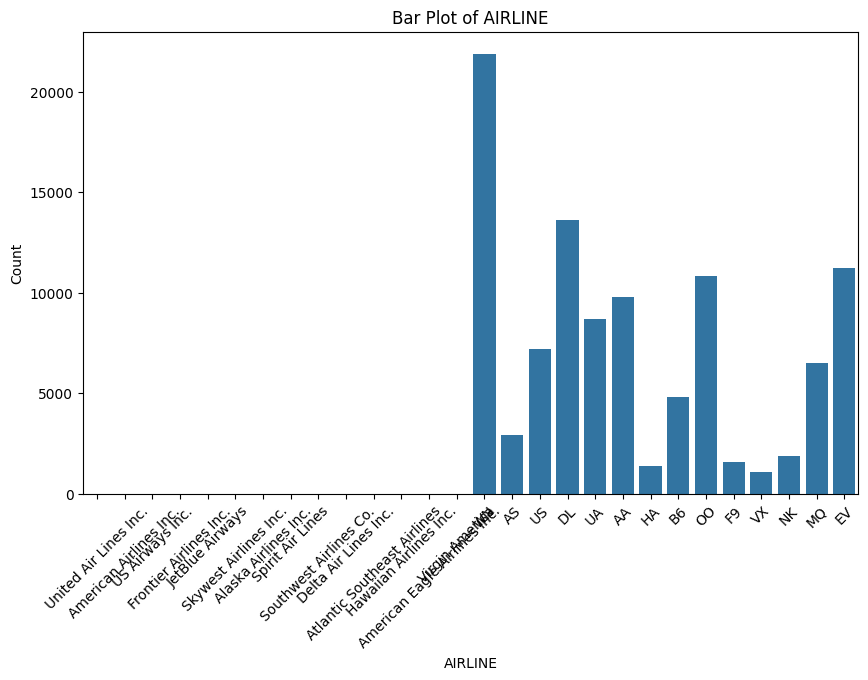

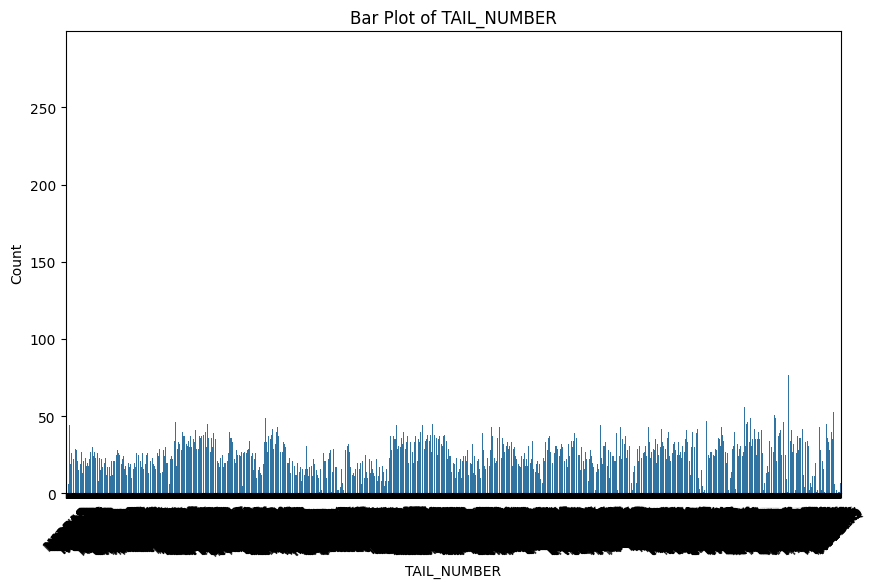

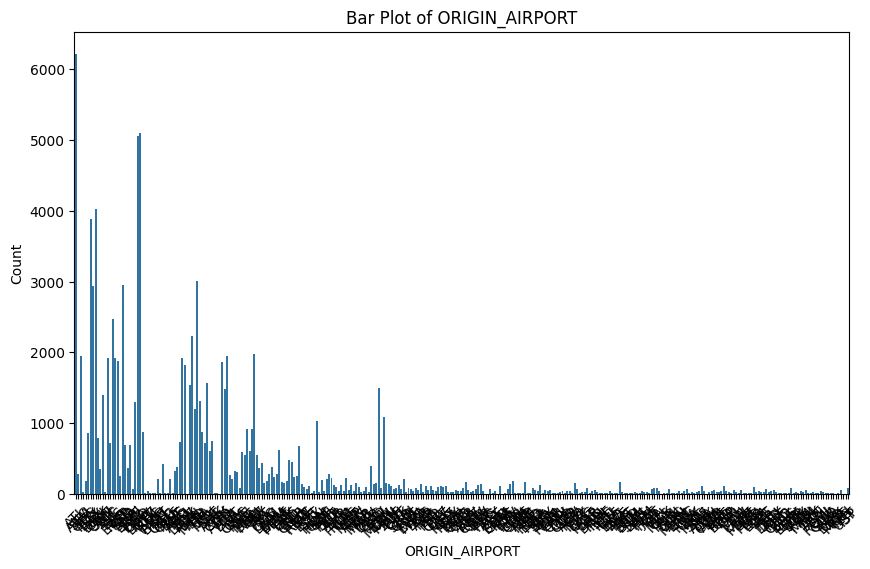

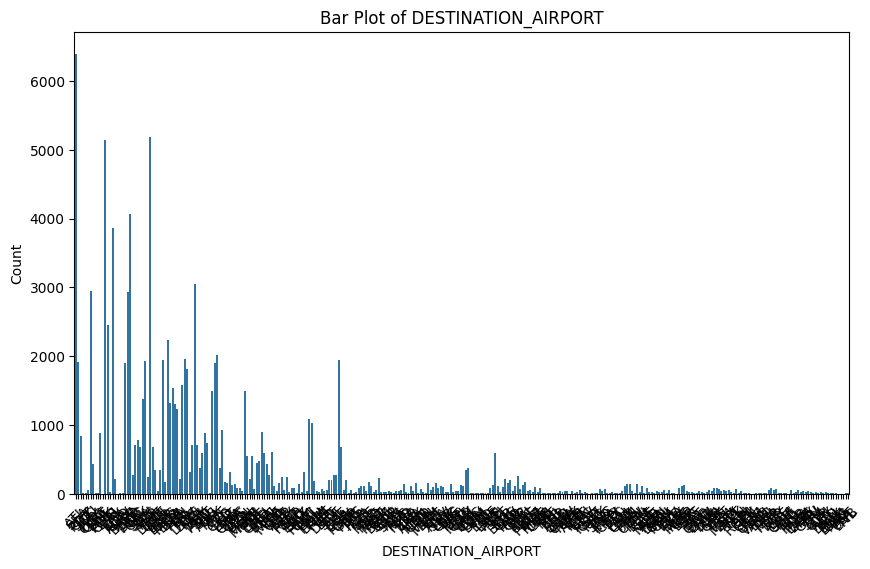

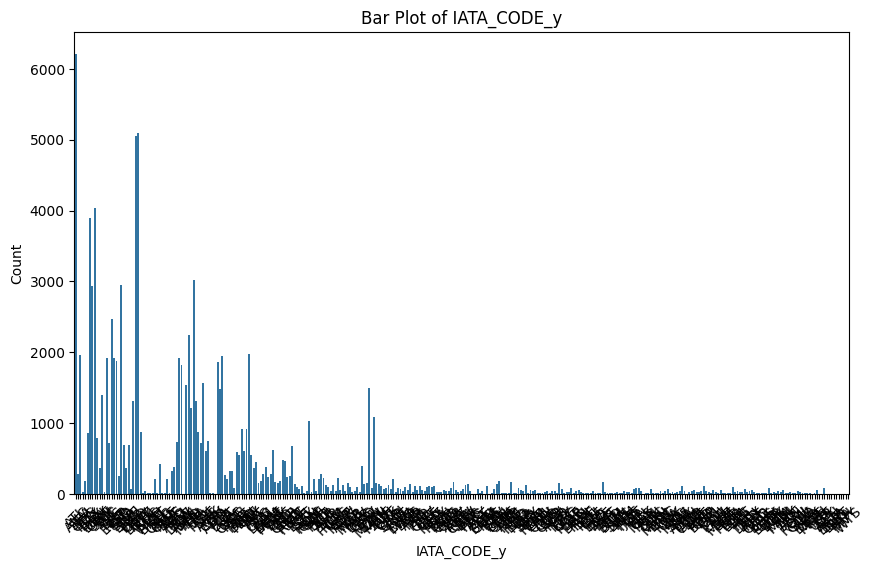

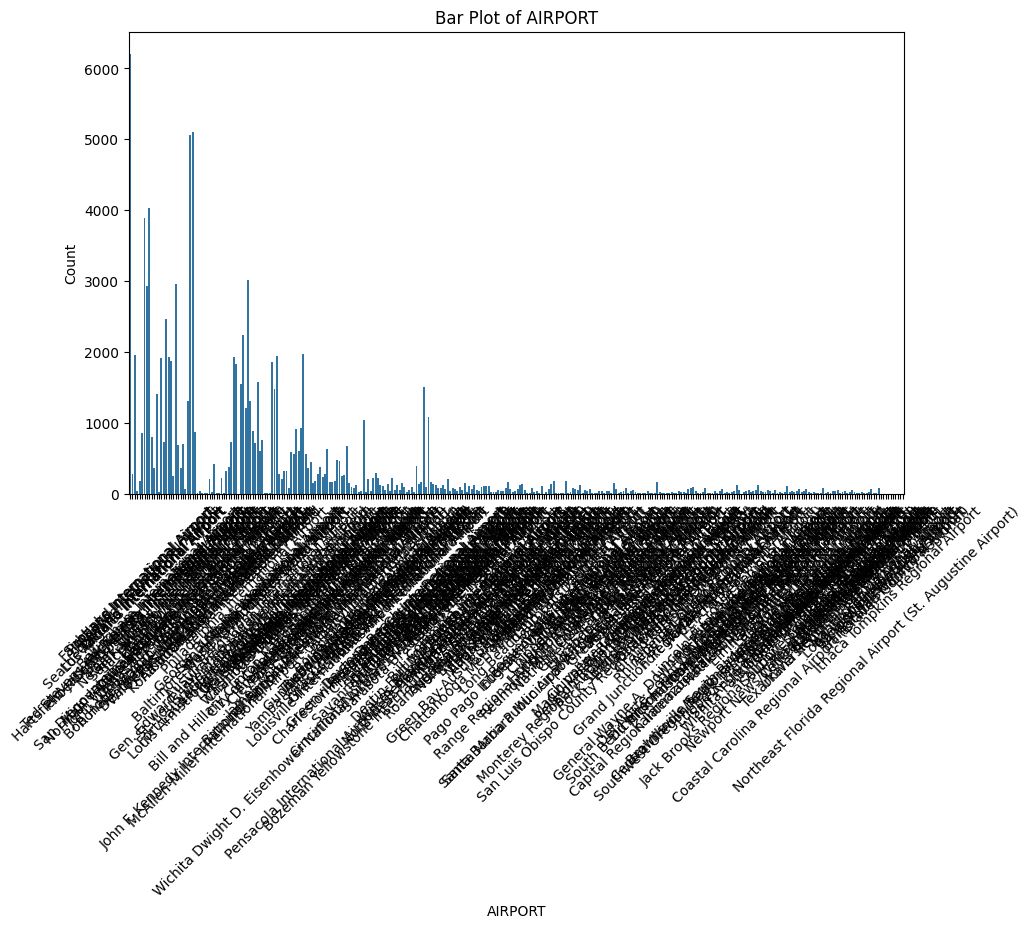

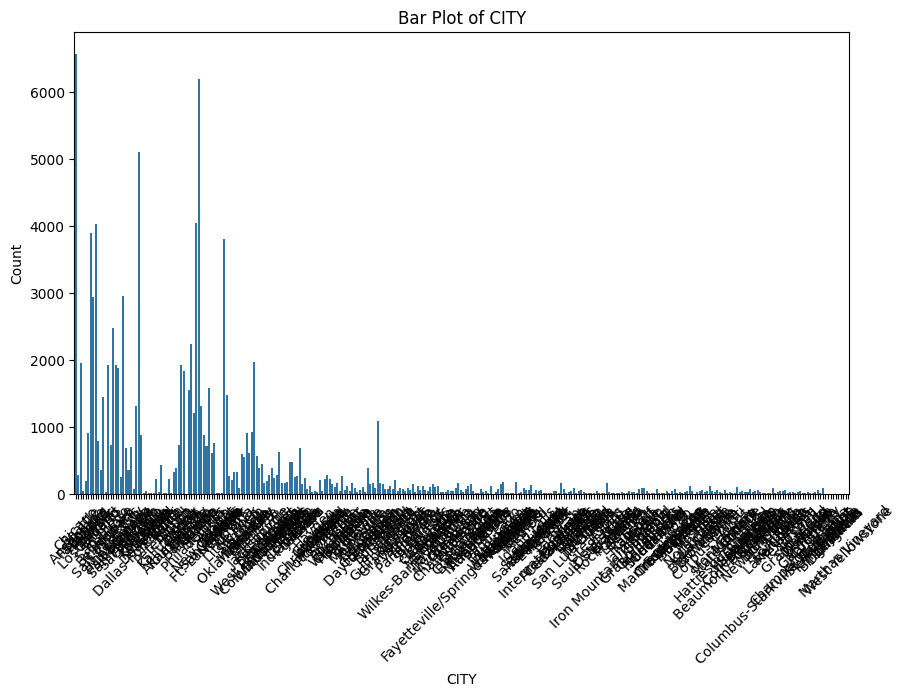

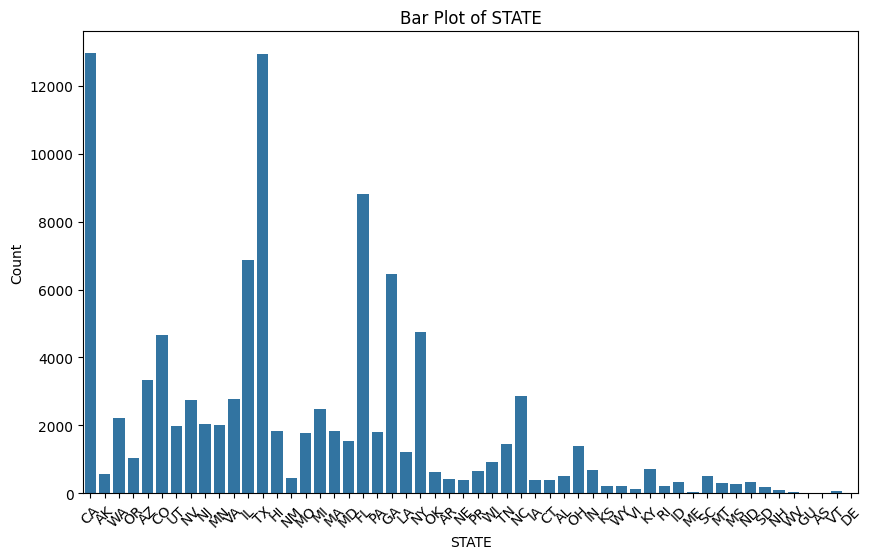

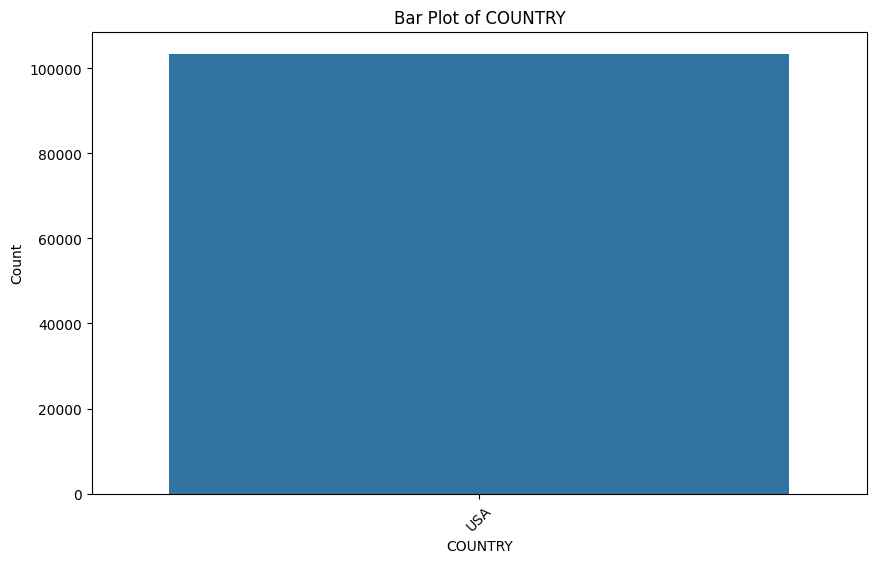

In [ ]:
 #Categorical features
categorical_features = cleaned_data.select_dtypes(include=['object']).columns.tolist()

# Create bar plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=cleaned_data)
    plt.title(f"Bar Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


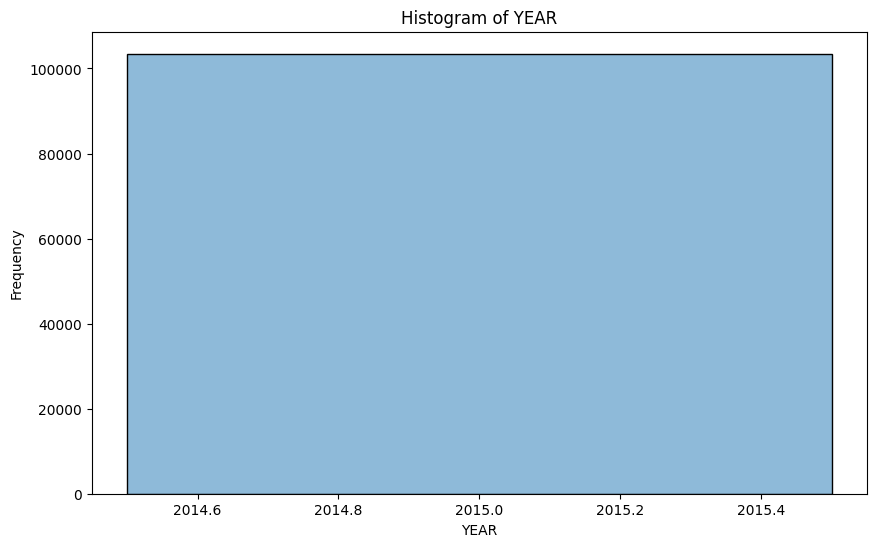

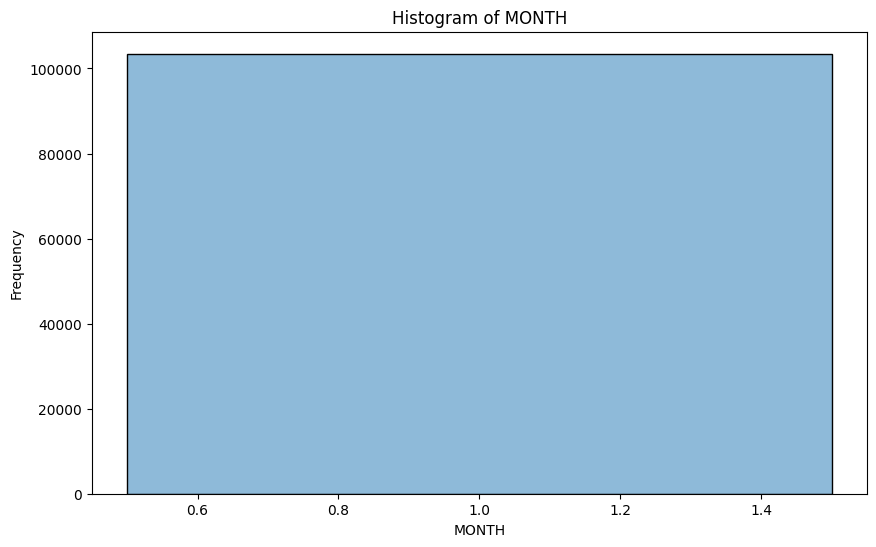

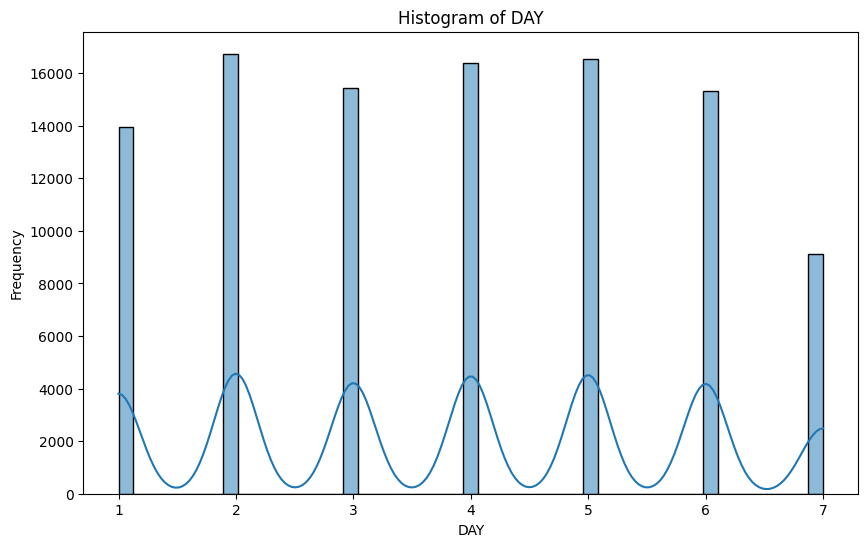

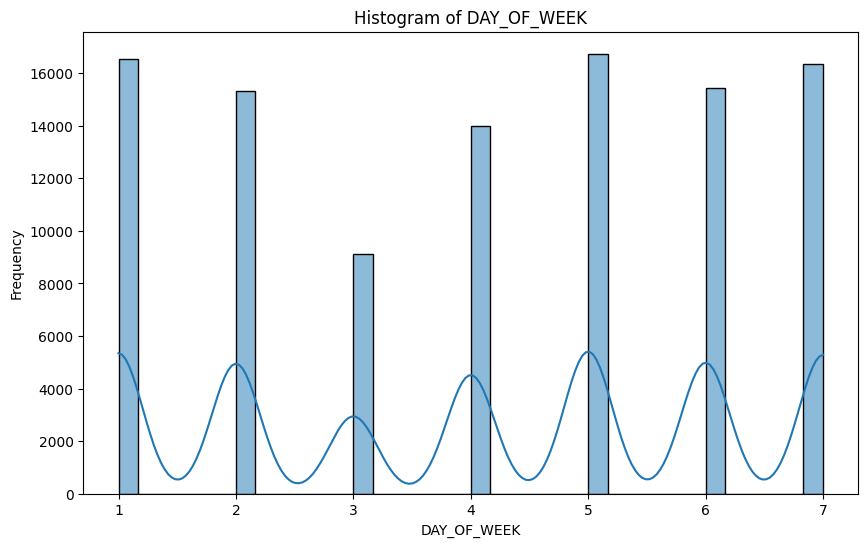

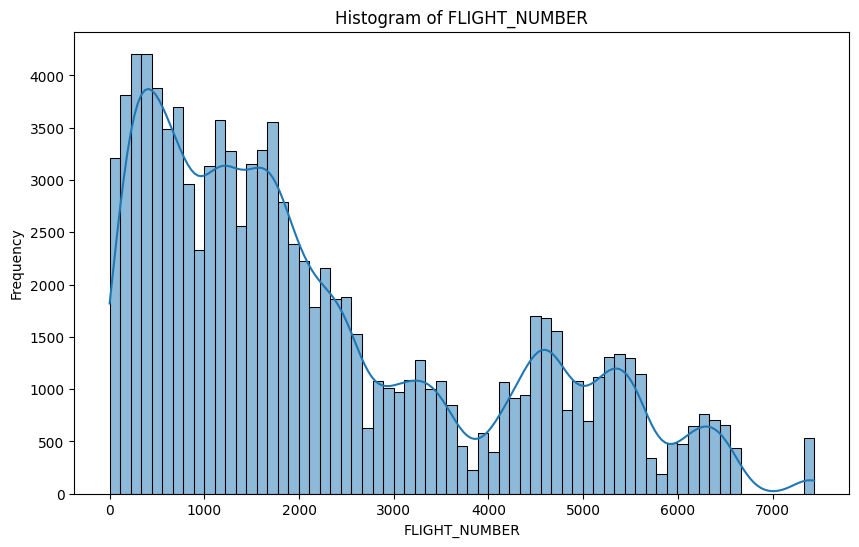

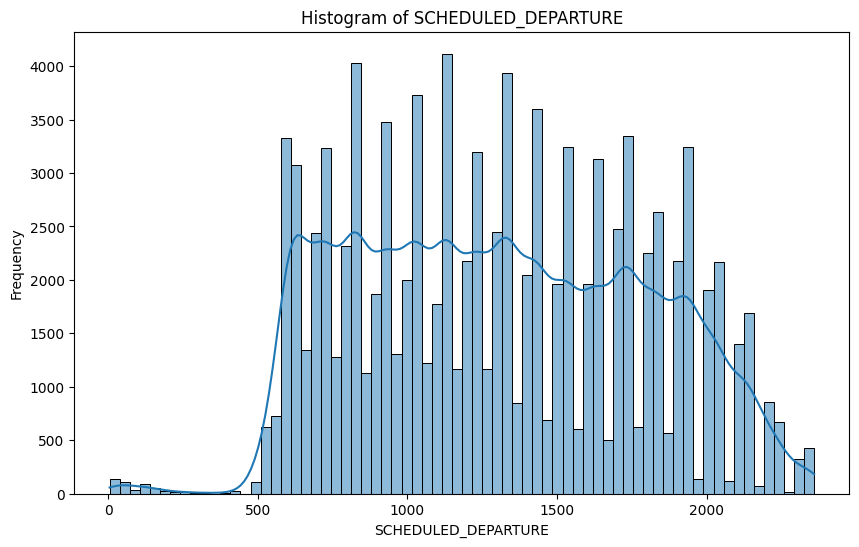

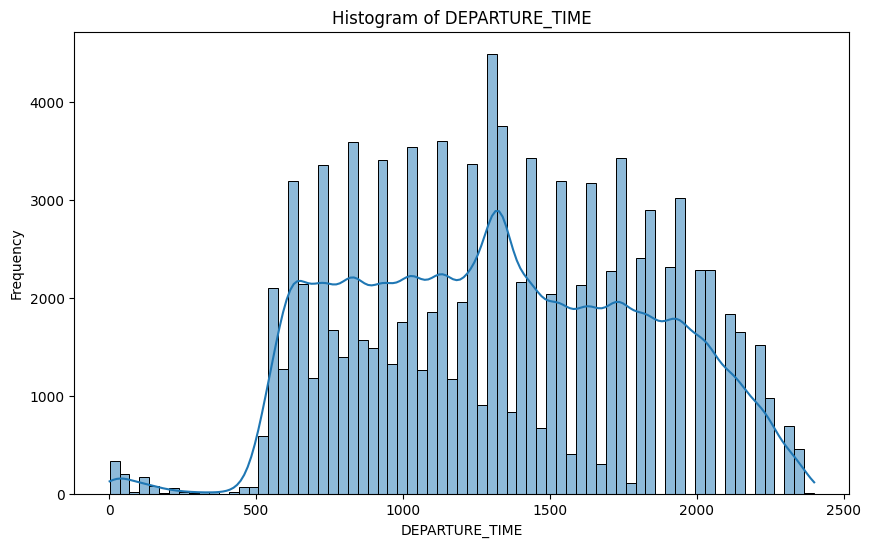

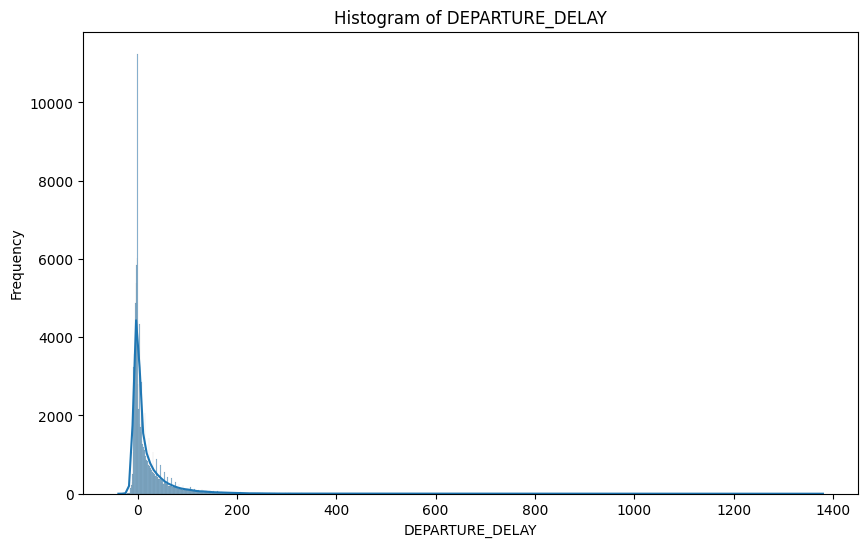

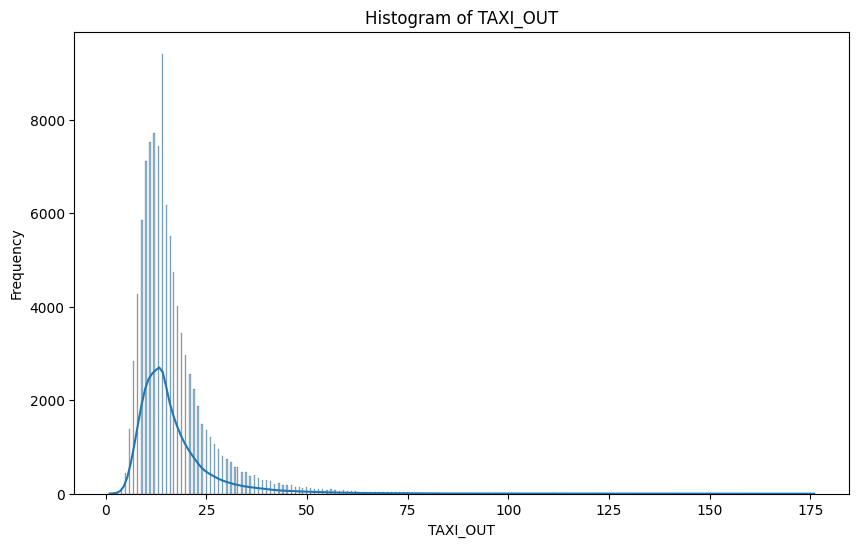

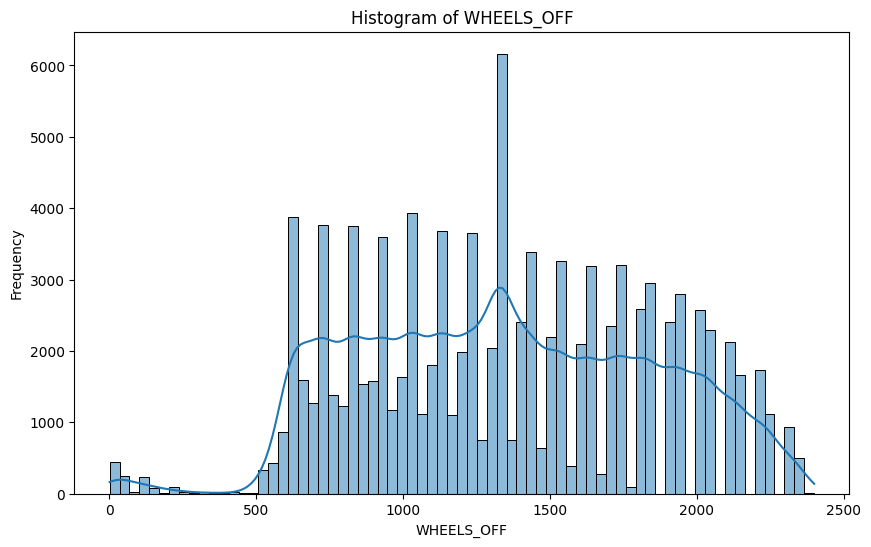

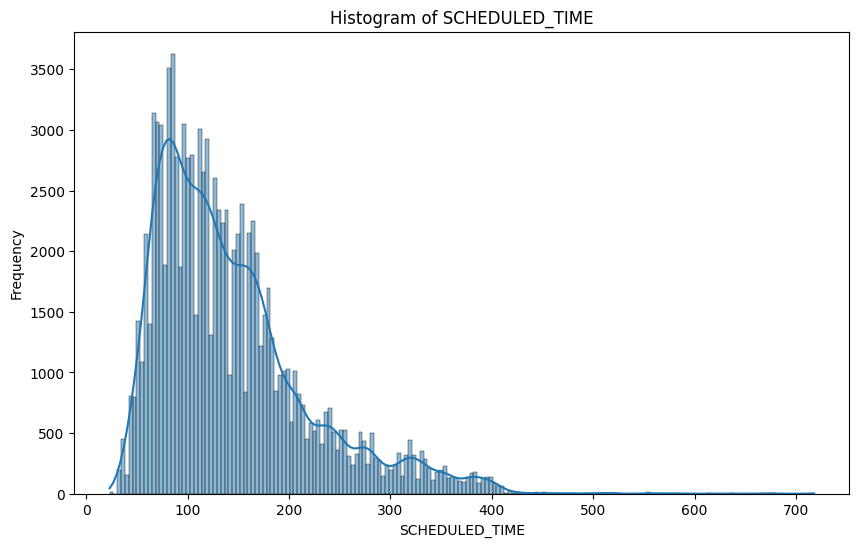

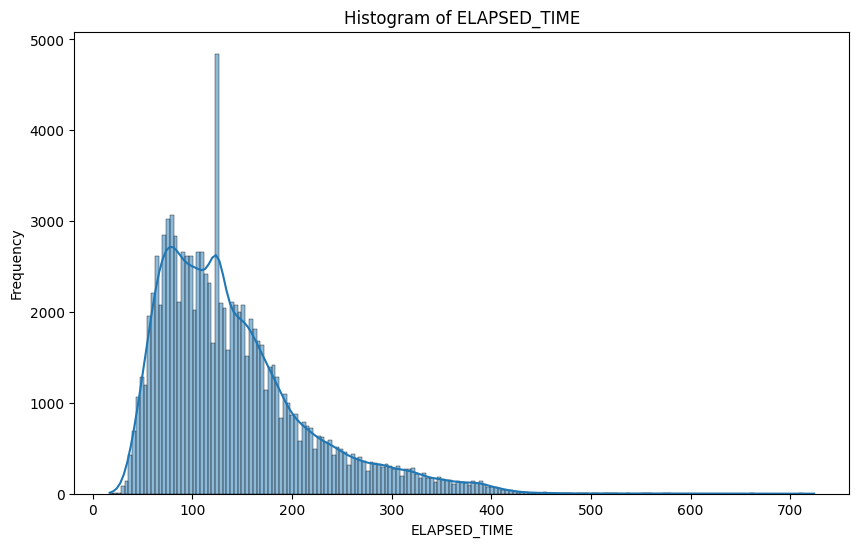

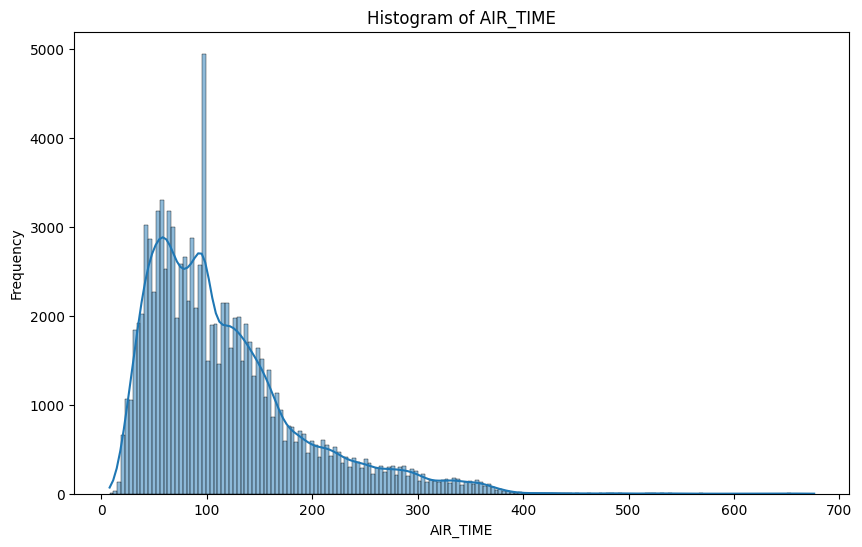

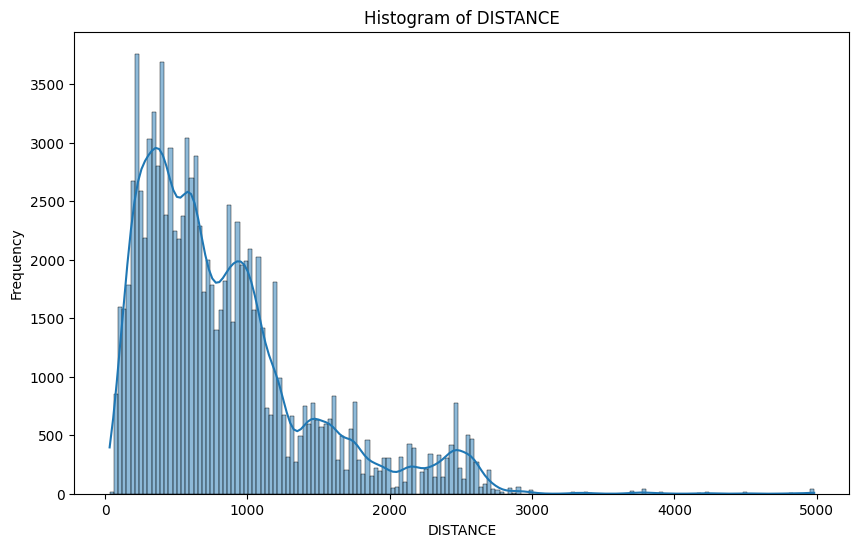

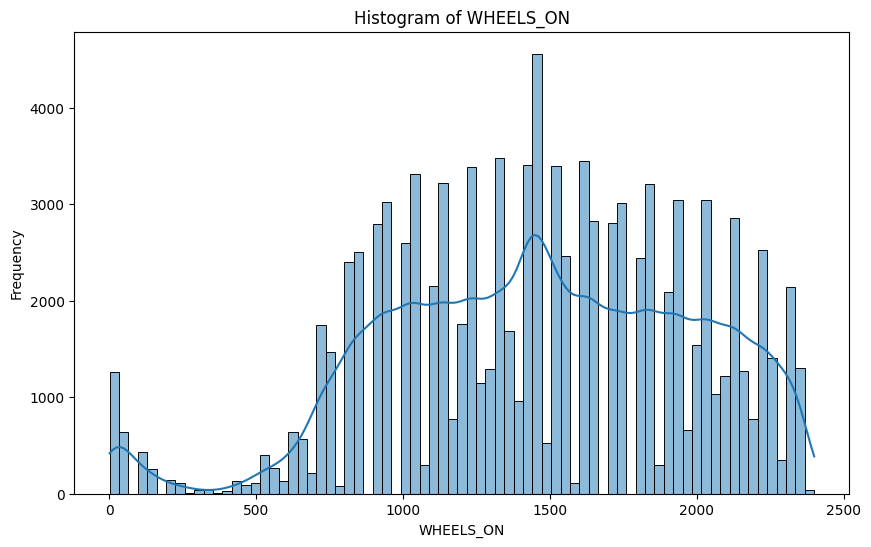

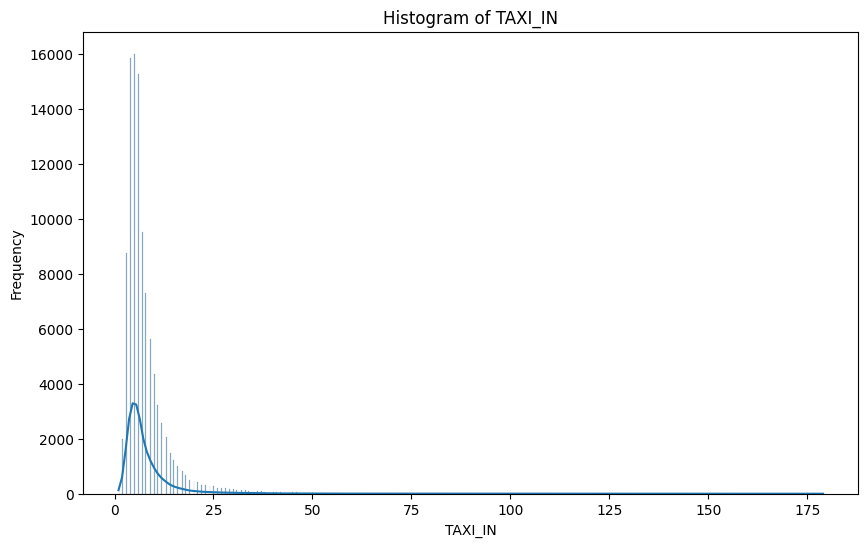

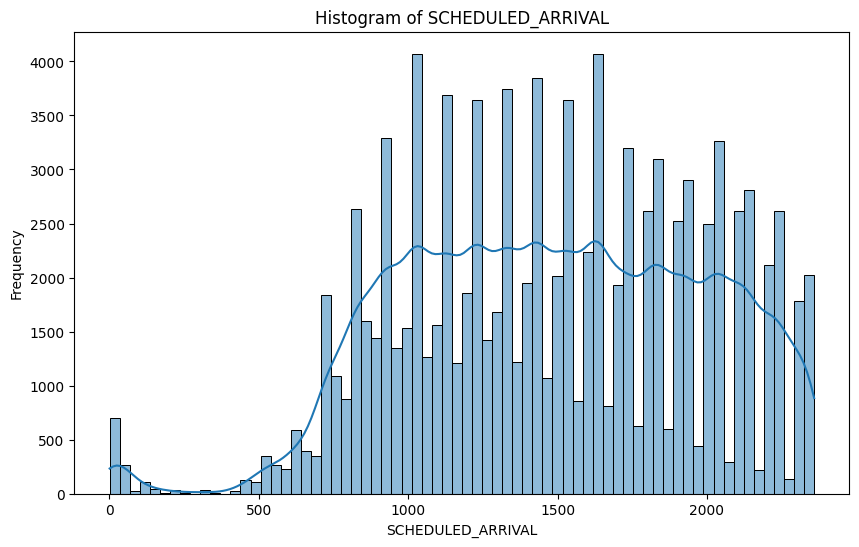

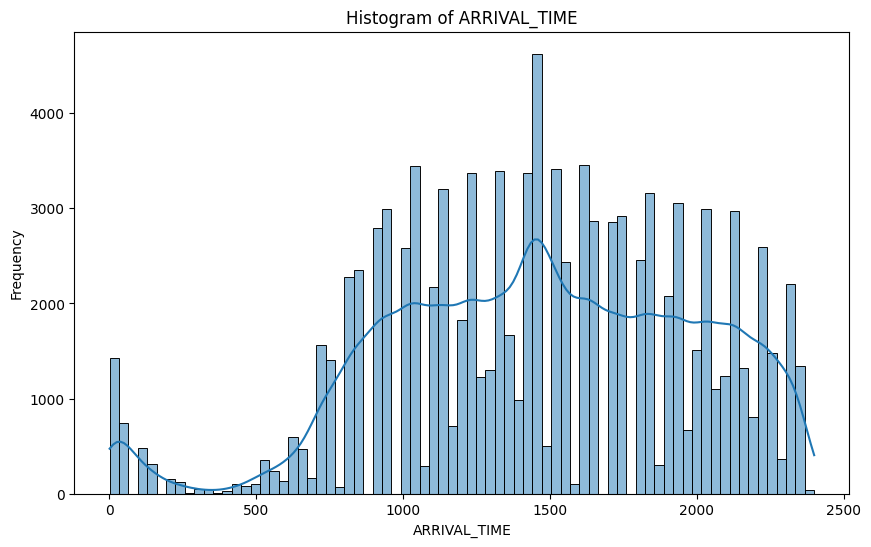

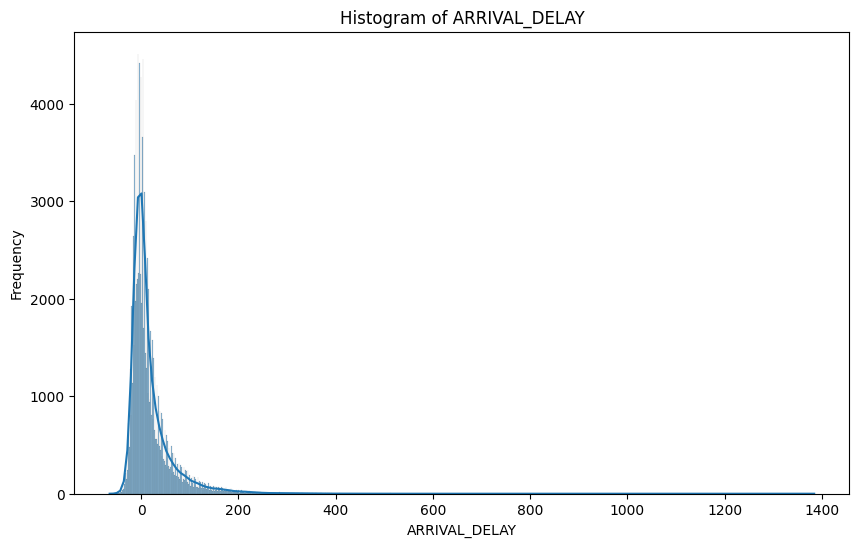

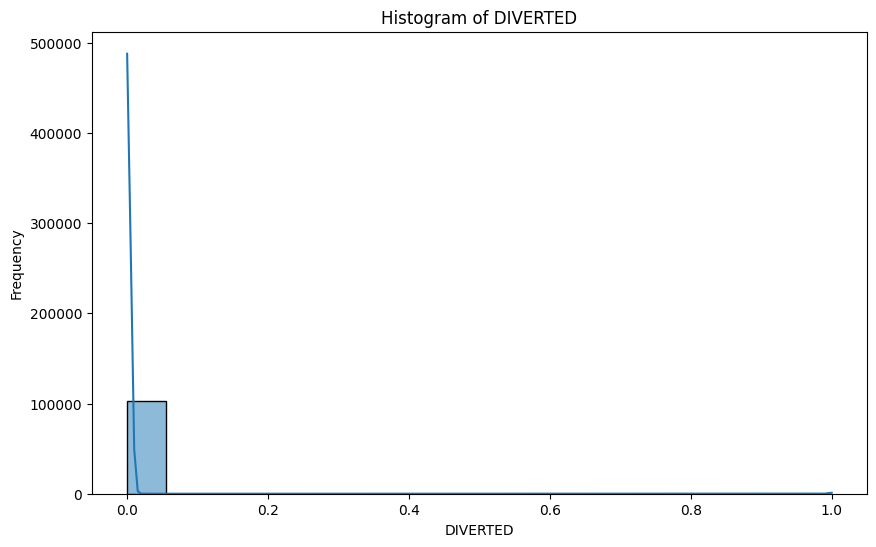

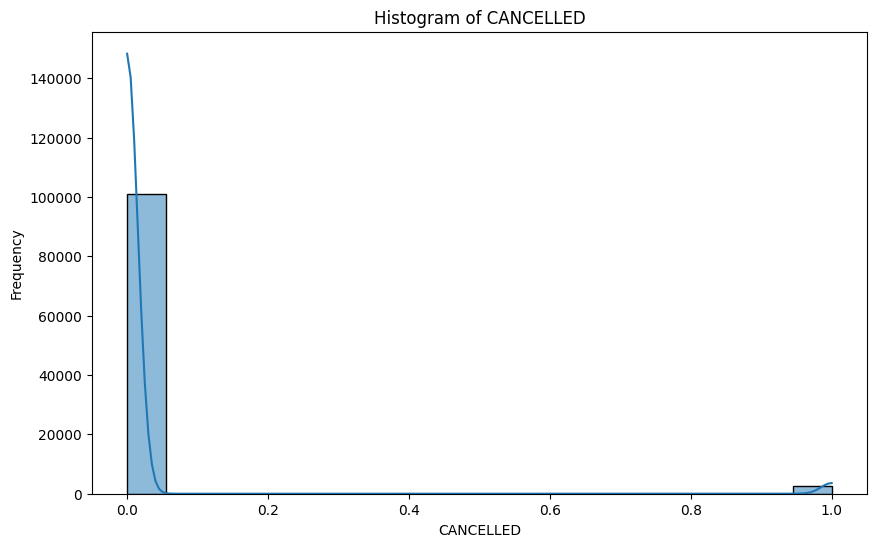

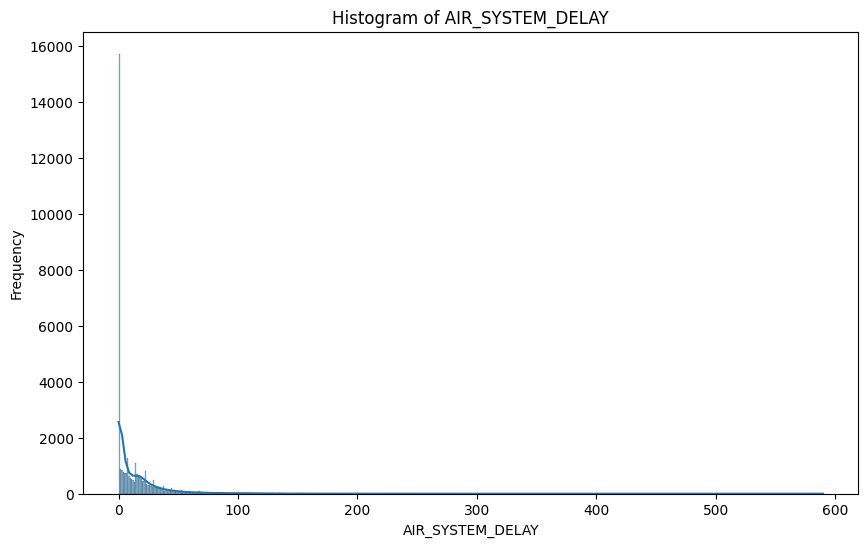

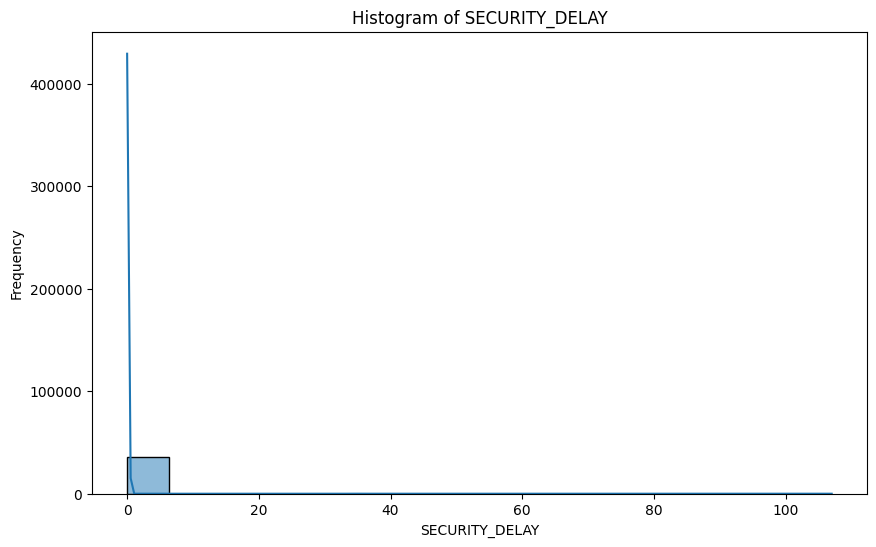

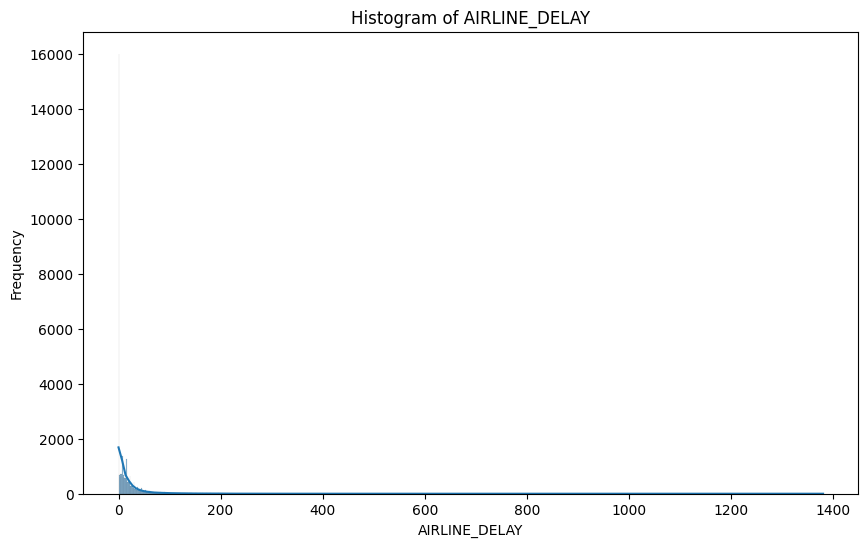

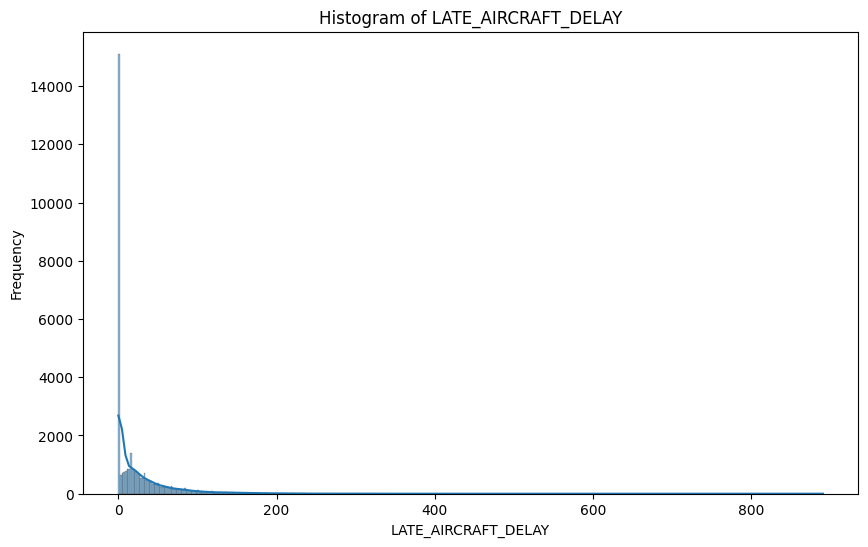

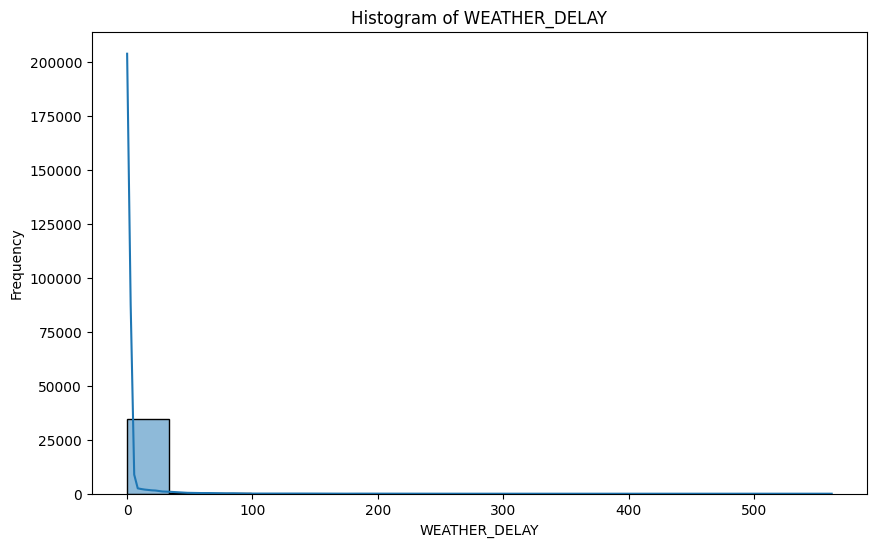

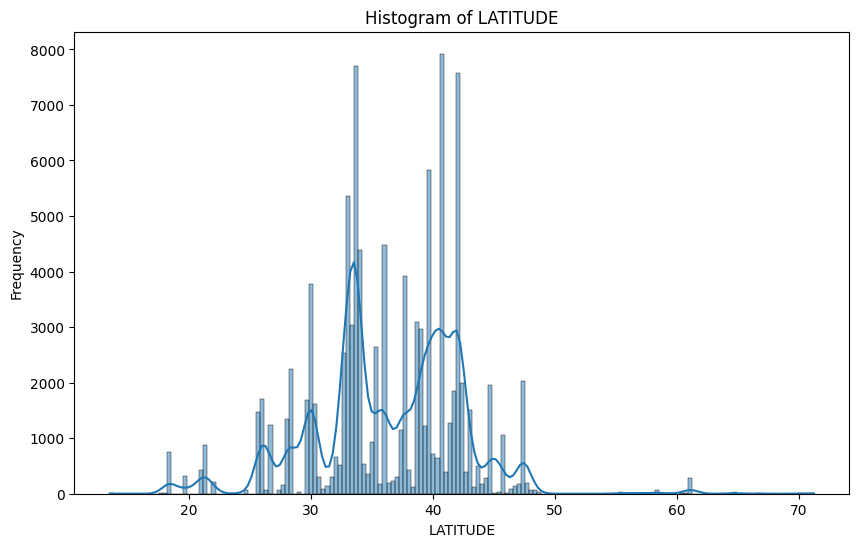

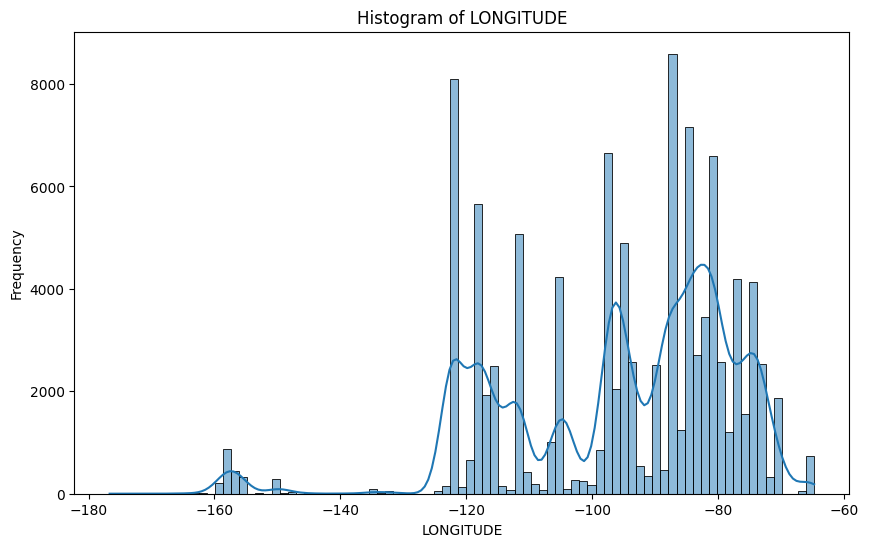

In [ ]:
#continuous features (excluding object type)
continuous_features = cleaned_data.select_dtypes(exclude=['object']).columns.tolist()

# Create histograms for each continuous feature
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(cleaned_data[feature], kde=True)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
# Define correlation ratio function for categorical and continuous features
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta

In [ ]:
def cramers_phi(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    # Handle case where denominator might be zero or invalid
    if (kcorr - 1) > 0 and (rcorr - 1) > 0:
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    else:
        return np.nan  # Return NaN if division is not valid

# Usage:
corr_value = cramers_phi(cleaned_data[feature1], cleaned_data[feature2])


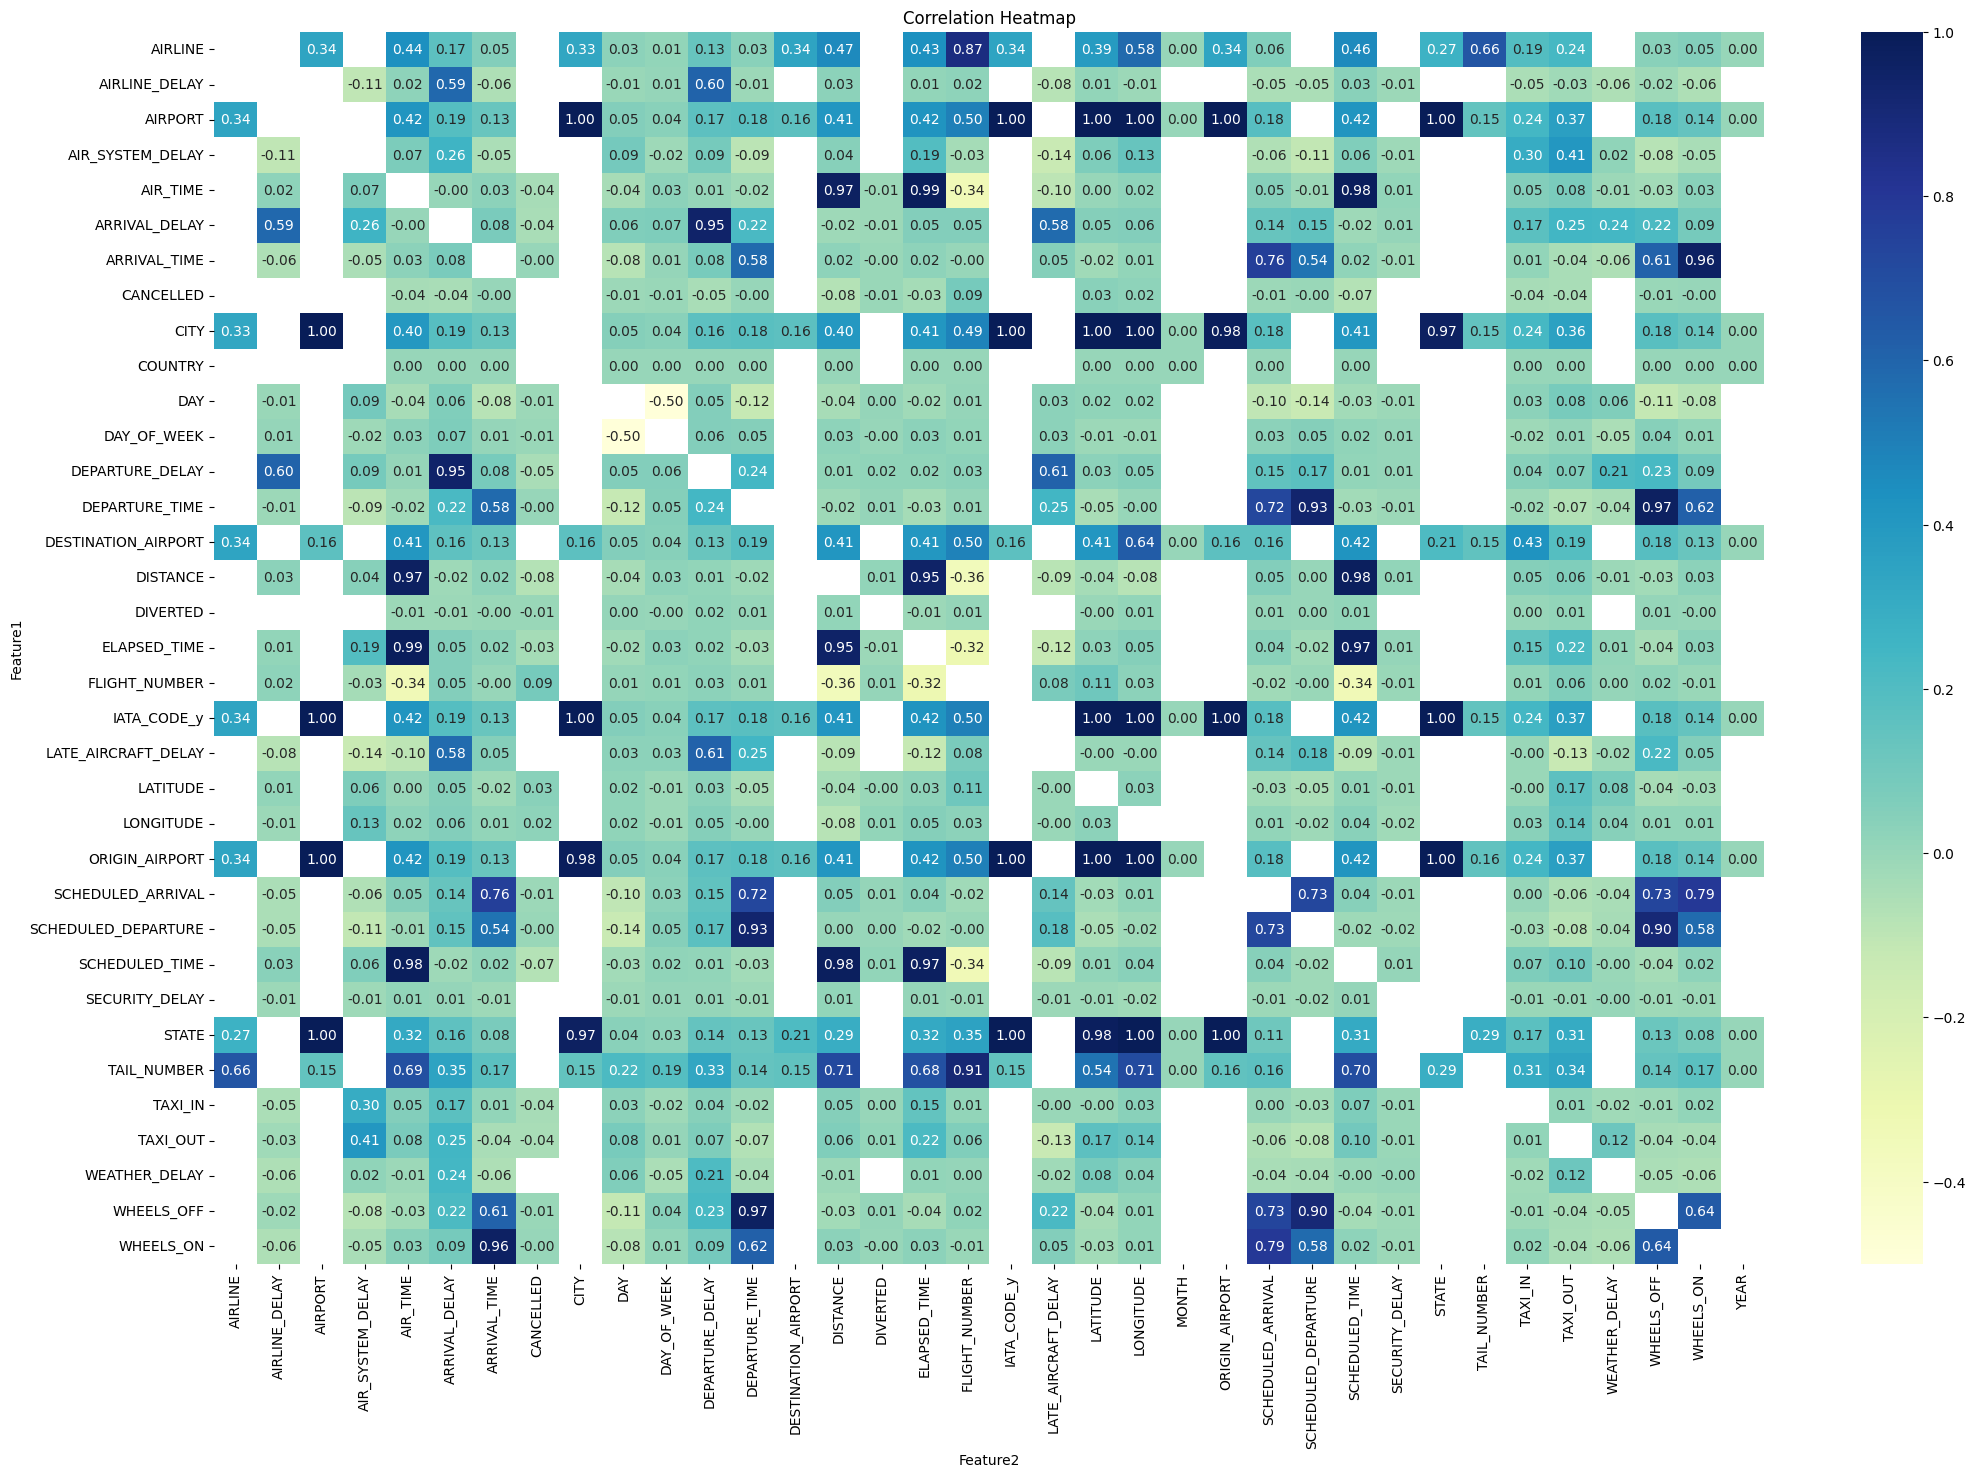

In [ ]:

# Calculate correlations between features
correlation_values = []

for feature1 in cleaned_data.columns:
    for feature2 in cleaned_data.columns:
        if feature1 != feature2:
            if cleaned_data[feature1].dtype in [np.float64, np.int64] and cleaned_data[feature2].dtype in [np.float64, np.int64]:
                # Case 3: Two Continuous Features - Pearson Correlation Coefficient
                corr_value = cleaned_data[feature1].corr(cleaned_data[feature2])
            elif cleaned_data[feature1].dtype == 'object' and (cleaned_data[feature2].dtype == np.float64 or cleaned_data[feature2].dtype == np.int64):
                # Case 1: One Categorical and One Continuous Feature - Correlation Ratio
                corr_value = correlation_ratio(cleaned_data[feature1], cleaned_data[feature2])
            elif cleaned_data[feature1].dtype == 'object' and cleaned_data[feature2].dtype == 'object':
                # Case 2: Two Categorical Features - Cramer's Phi
                corr_value = cramers_phi(cleaned_data[feature1], cleaned_data[feature2])
            else:
                corr_value = np.nan  # Handle other cases (e.g., between two continuous features)

            correlation_values.append((feature1, feature2, corr_value))

# Create a DataFrame to hold correlation values
correlation_df = pd.DataFrame(correlation_values, columns=['Feature1', 'Feature2', 'Correlation'])

# Remove rows with NaN values (non-calculable correlations)
correlation_df = correlation_df.dropna()

# Create correlation matrix for heatmap
correlation_matrix = pd.pivot_table(correlation_df, values='Correlation', index='Feature1', columns='Feature2')

# Plot the correlation heatmap
plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

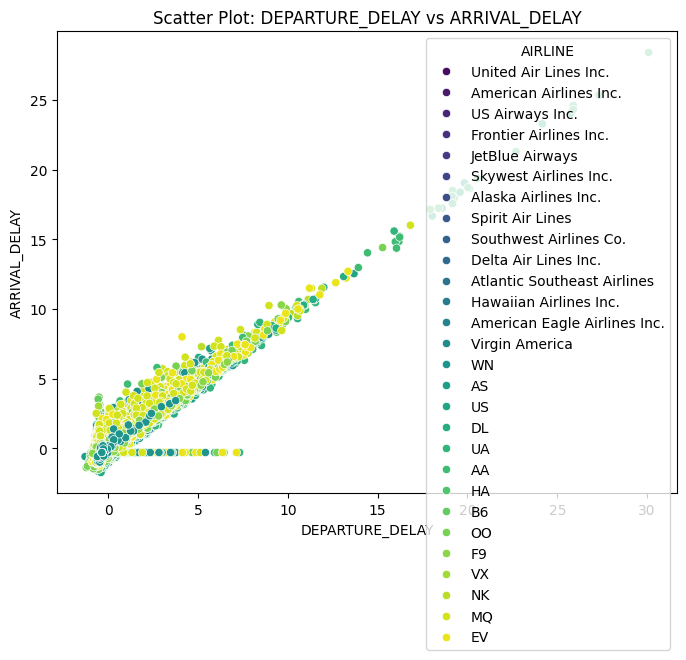

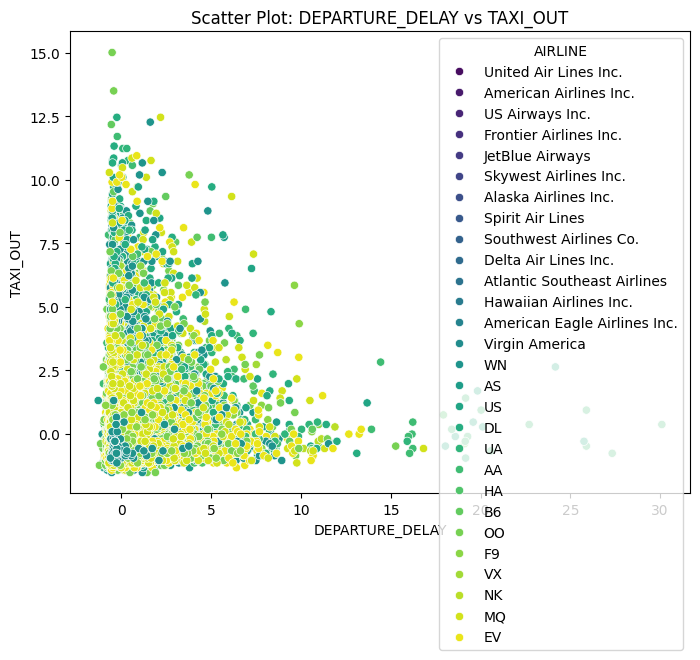

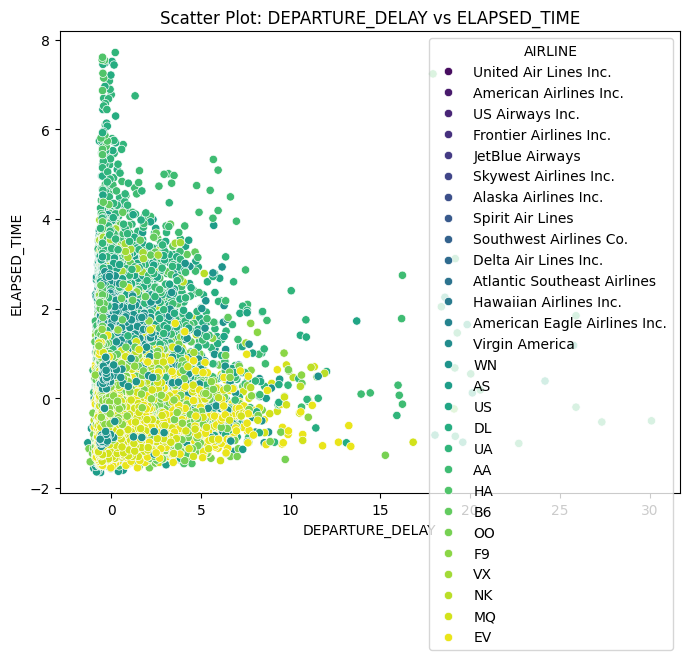

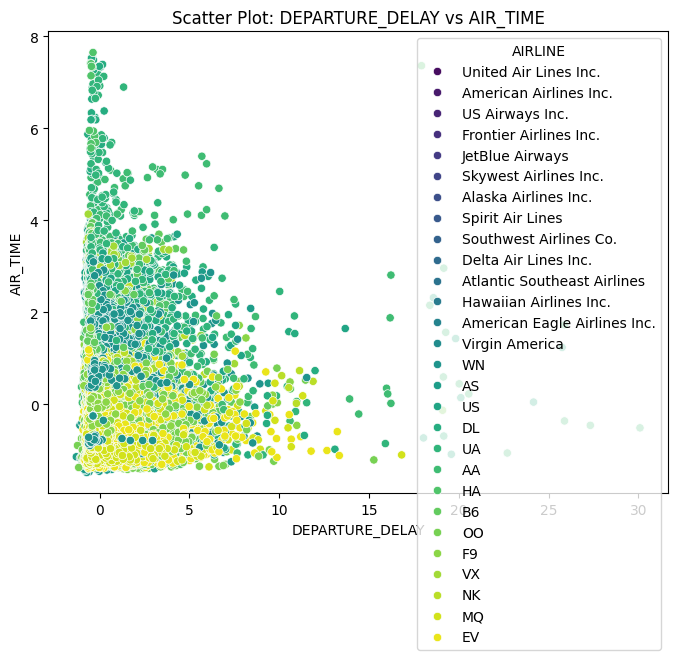

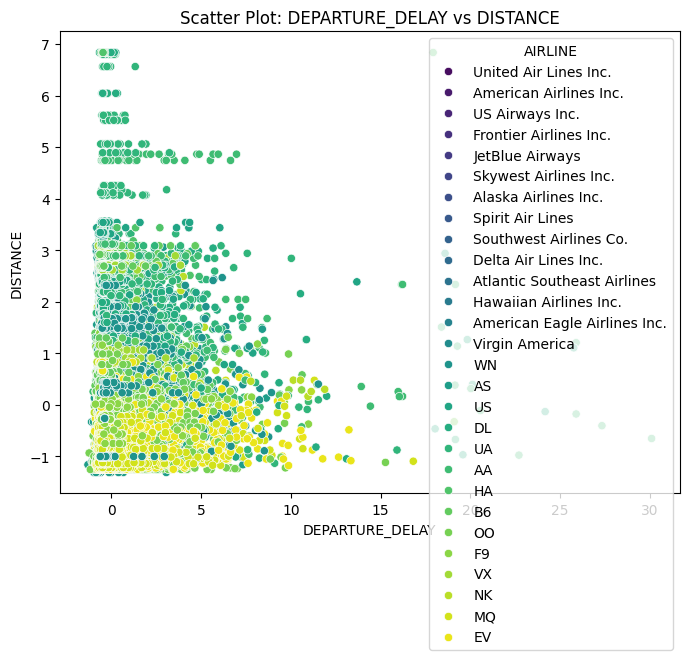

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


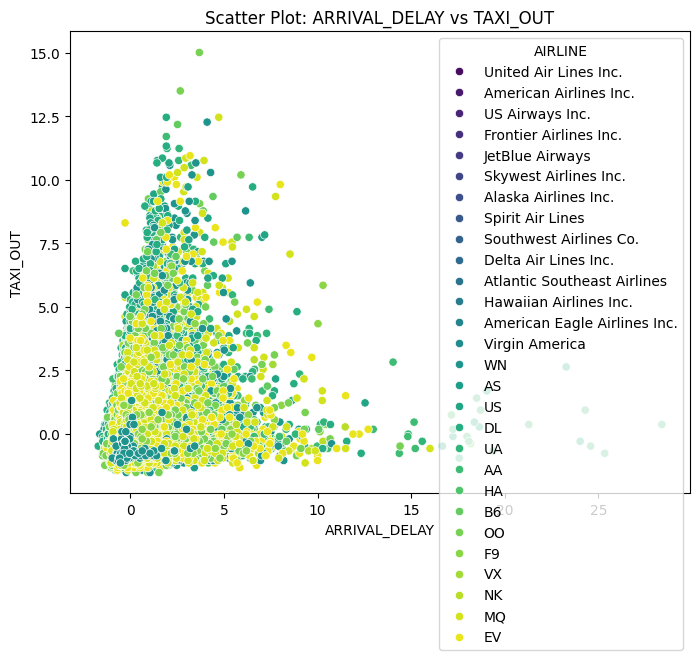

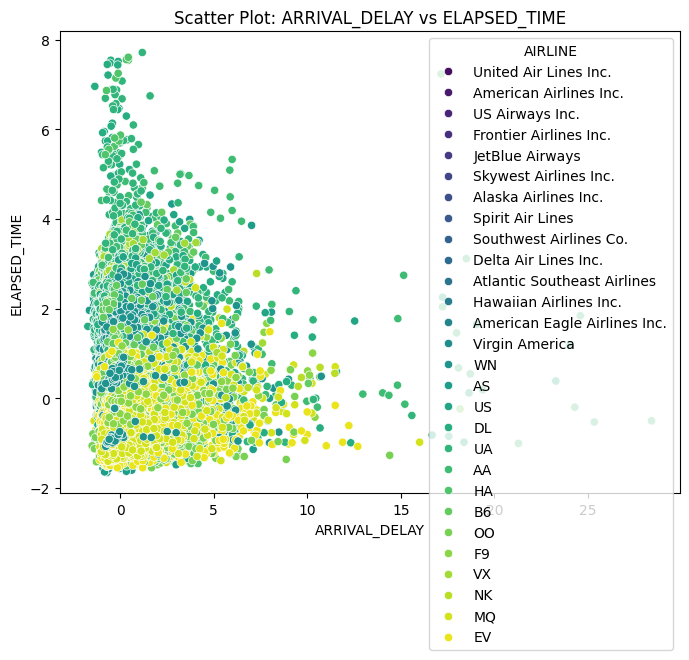

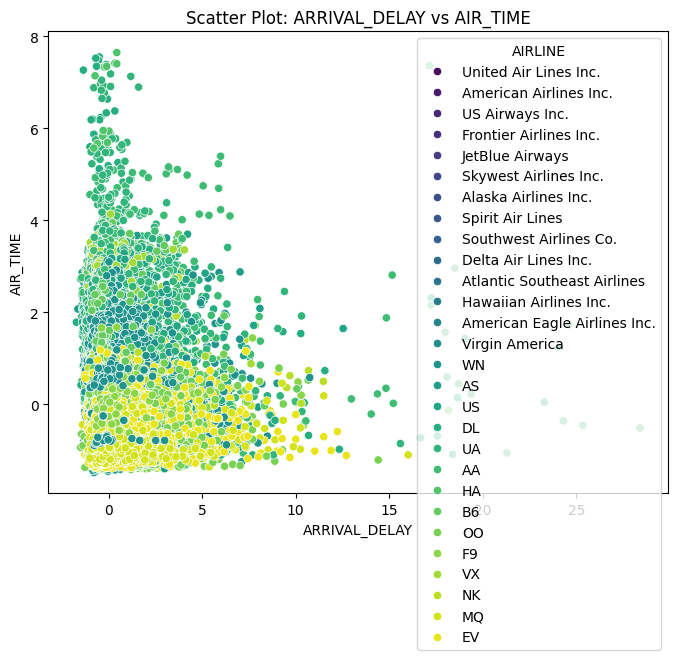

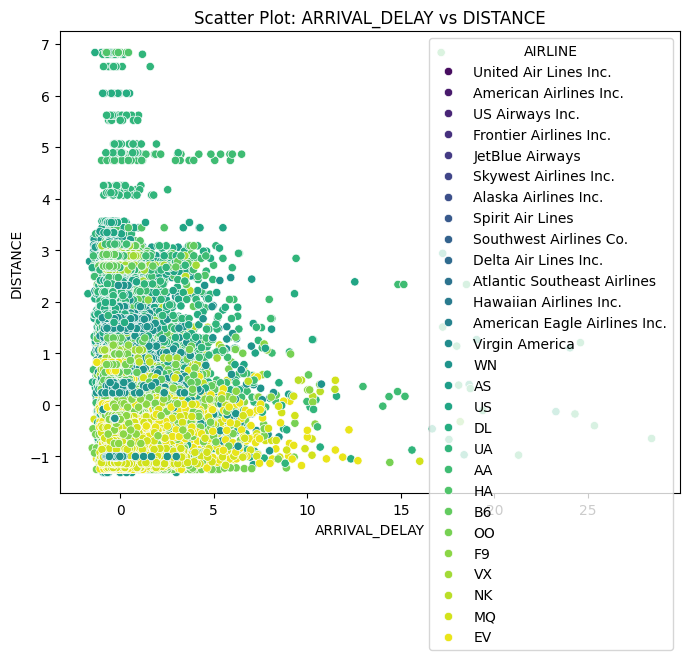

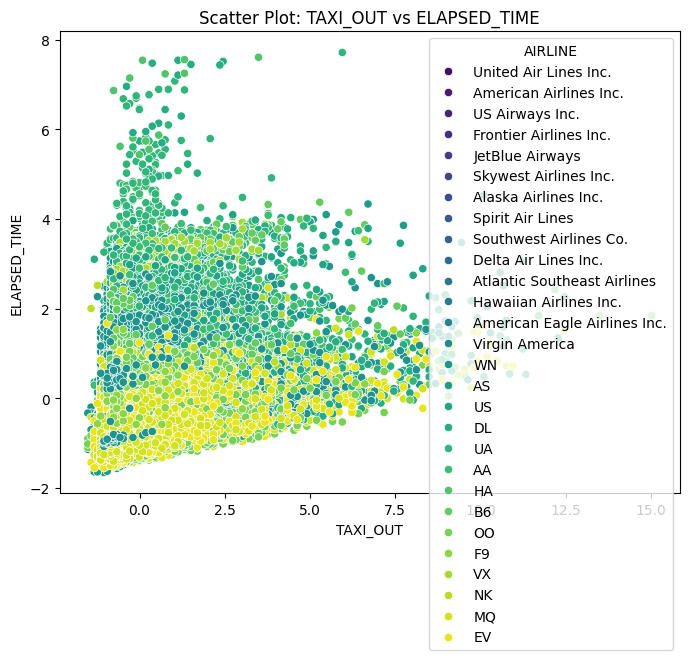

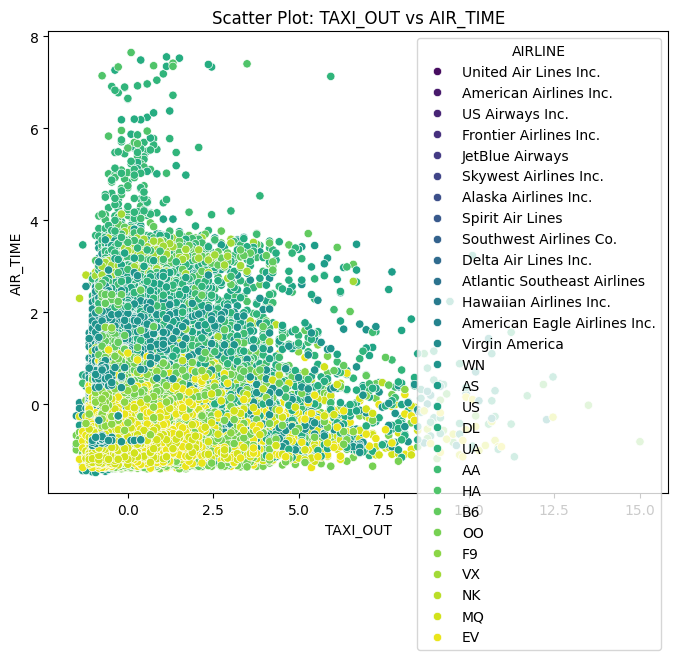

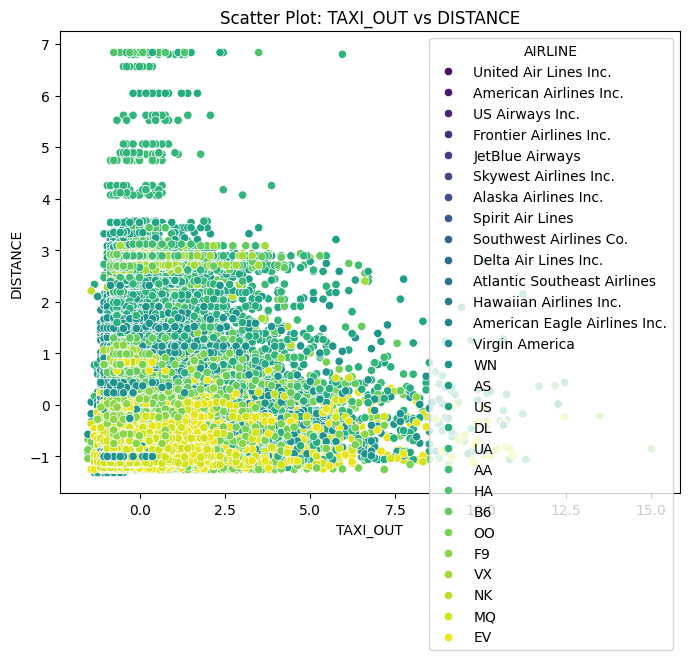

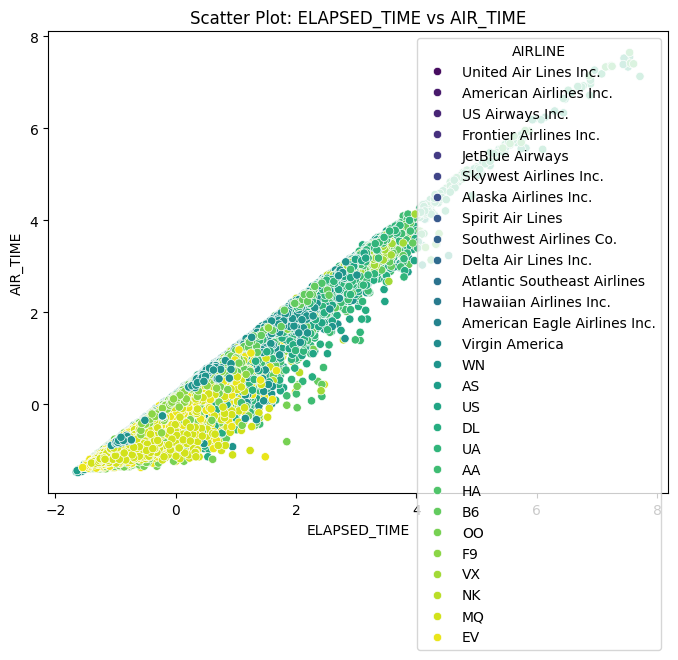

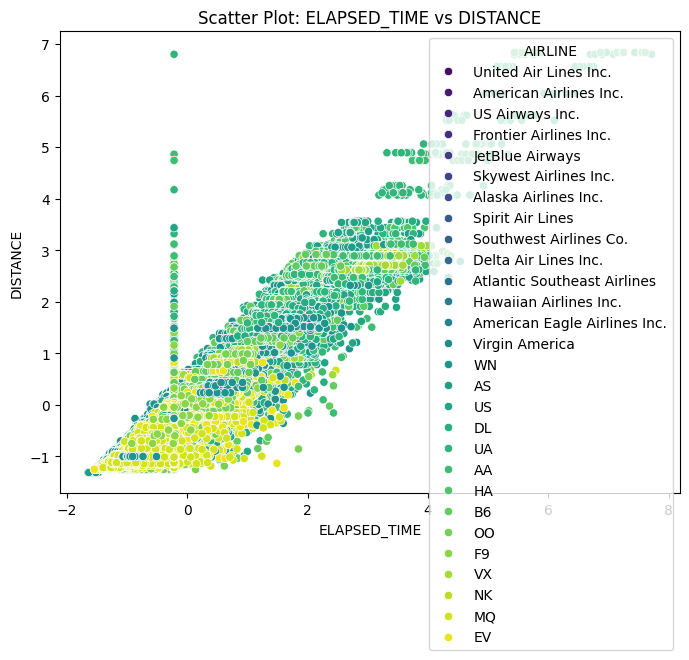

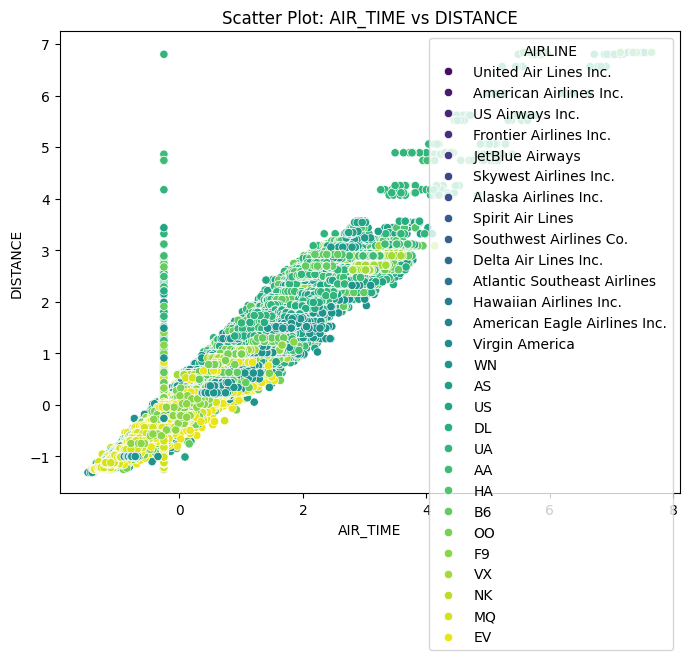

In [ ]:
# Define continuous and categorical feature names
continuous_features = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE']
categorical_feature = 'AIRLINE'  # Example categorical feature to color code

# Standardize continuous features
scaler = StandardScaler()
cleaned_data[continuous_features] = scaler.fit_transform(cleaned_data[continuous_features])

# Create scatter plots between continuous features
for i in range(len(continuous_features)):
    for j in range(i + 1, len(continuous_features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            x=continuous_features[i],
            y=continuous_features[j],
            hue=categorical_feature,
            data=cleaned_data,
            palette='viridis',
            legend='full'
        )
        plt.title(f'Scatter Plot: {continuous_features[i]} vs {continuous_features[j]}')
        plt.xlabel(continuous_features[i])
        plt.ylabel(continuous_features[j])
        plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


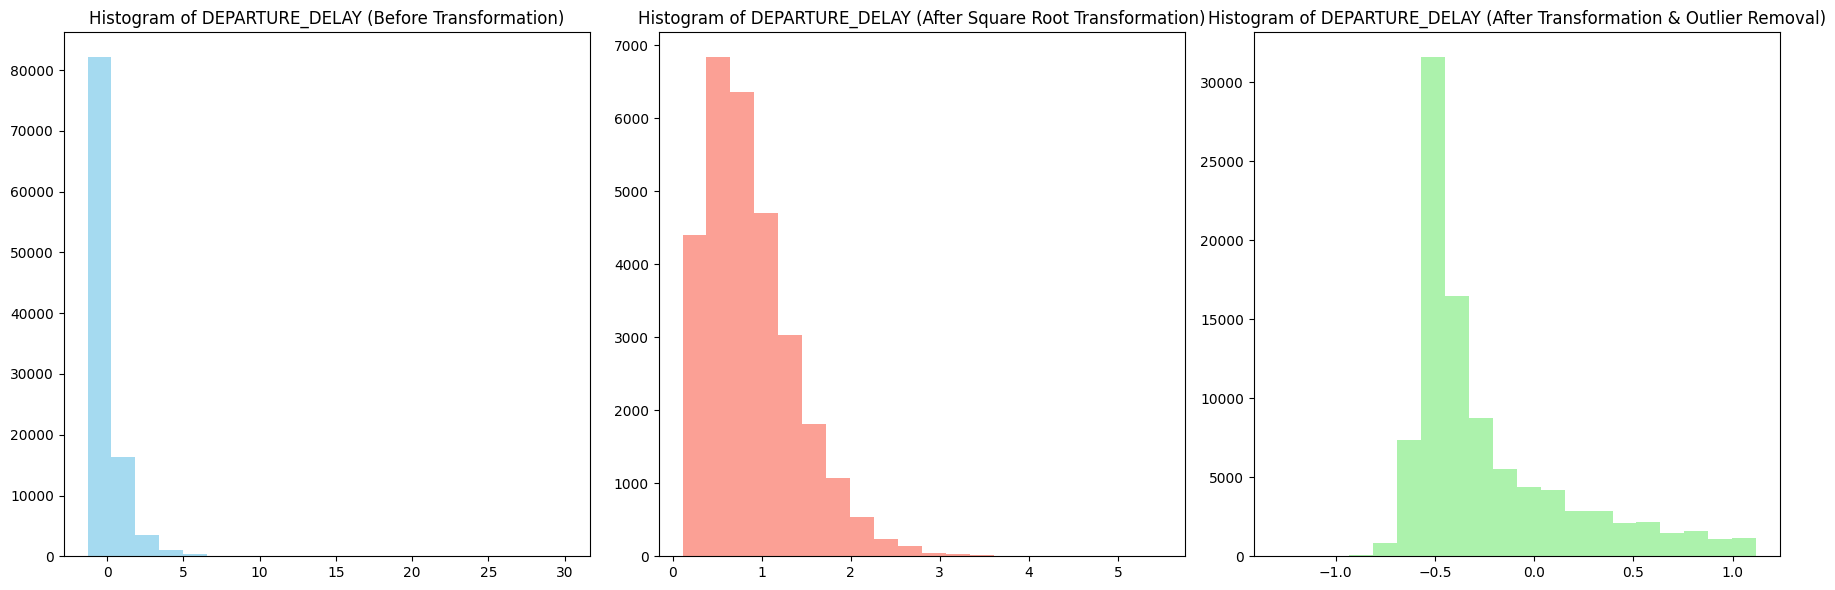

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


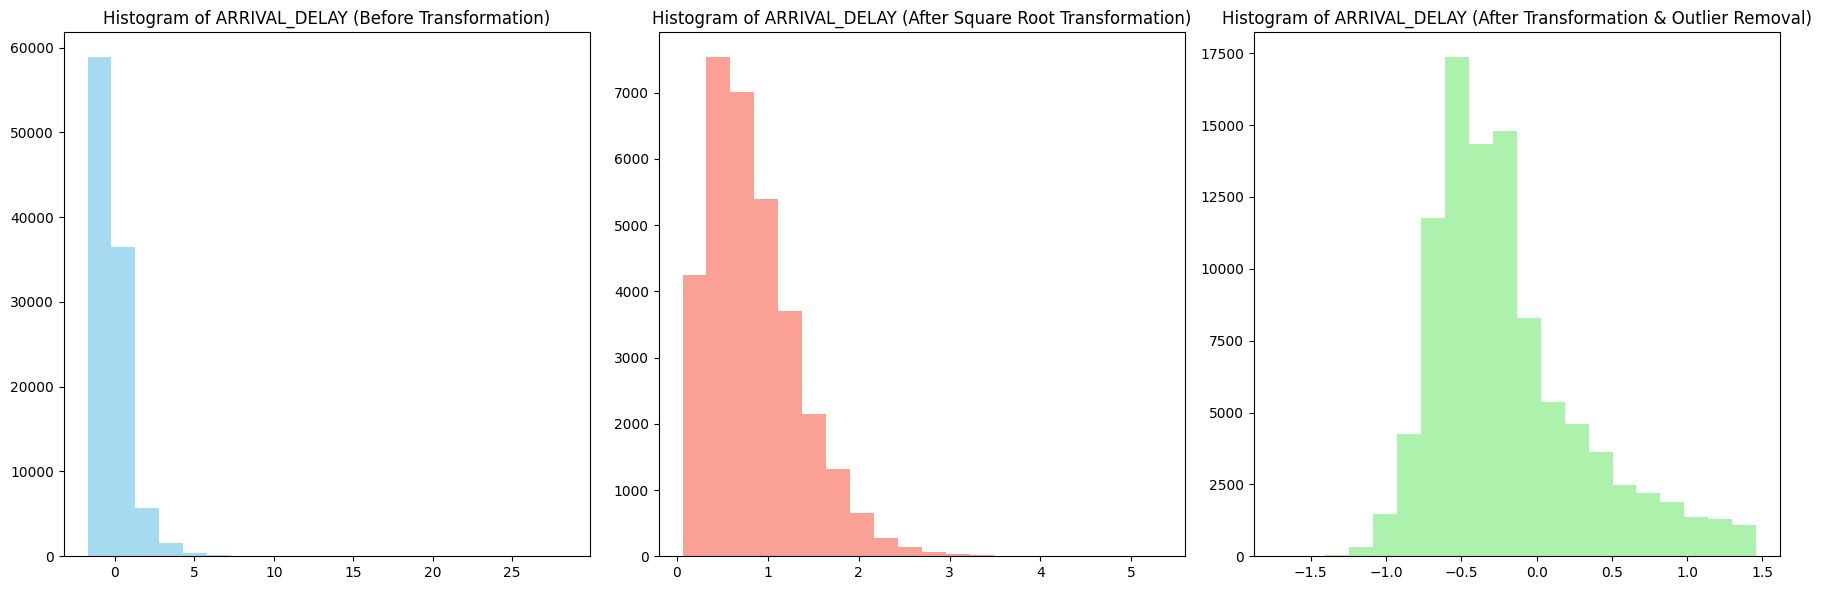

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


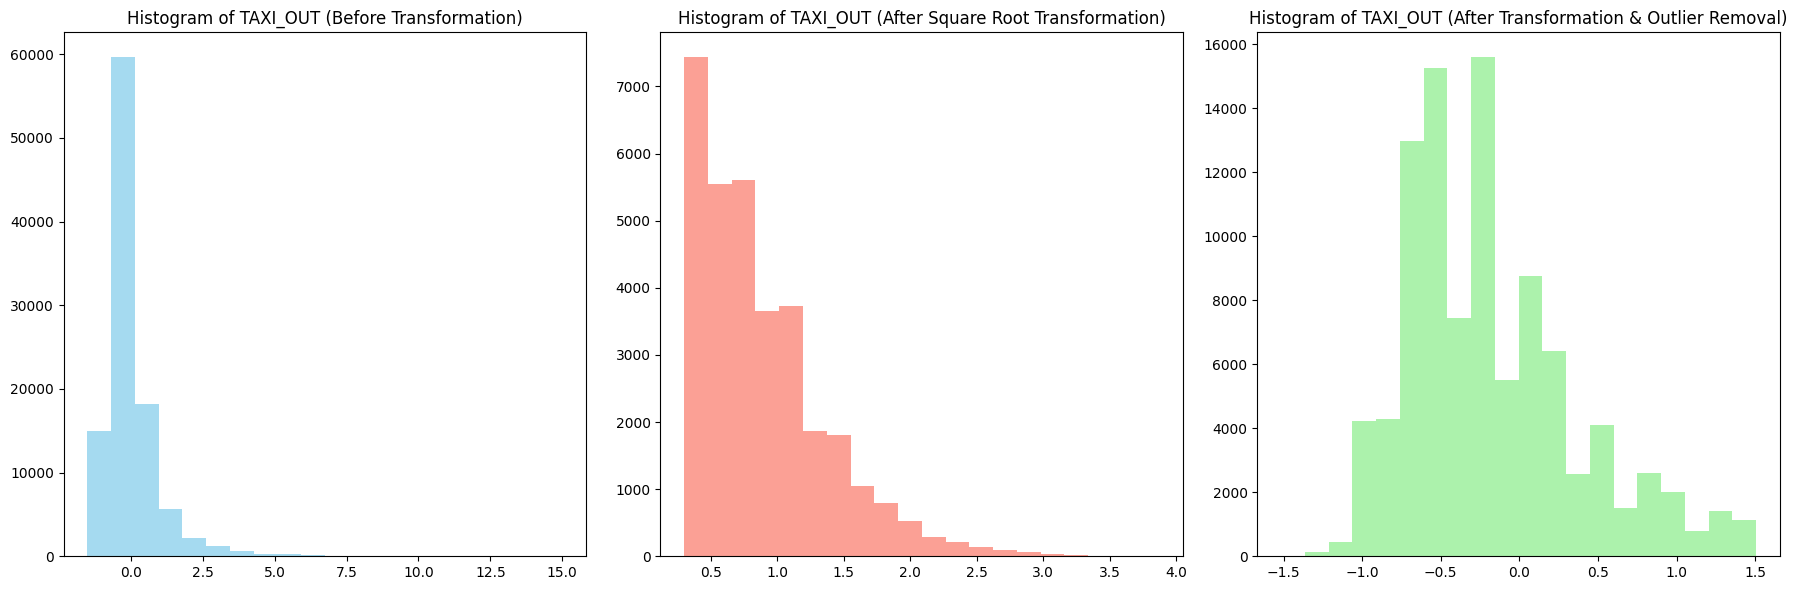

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


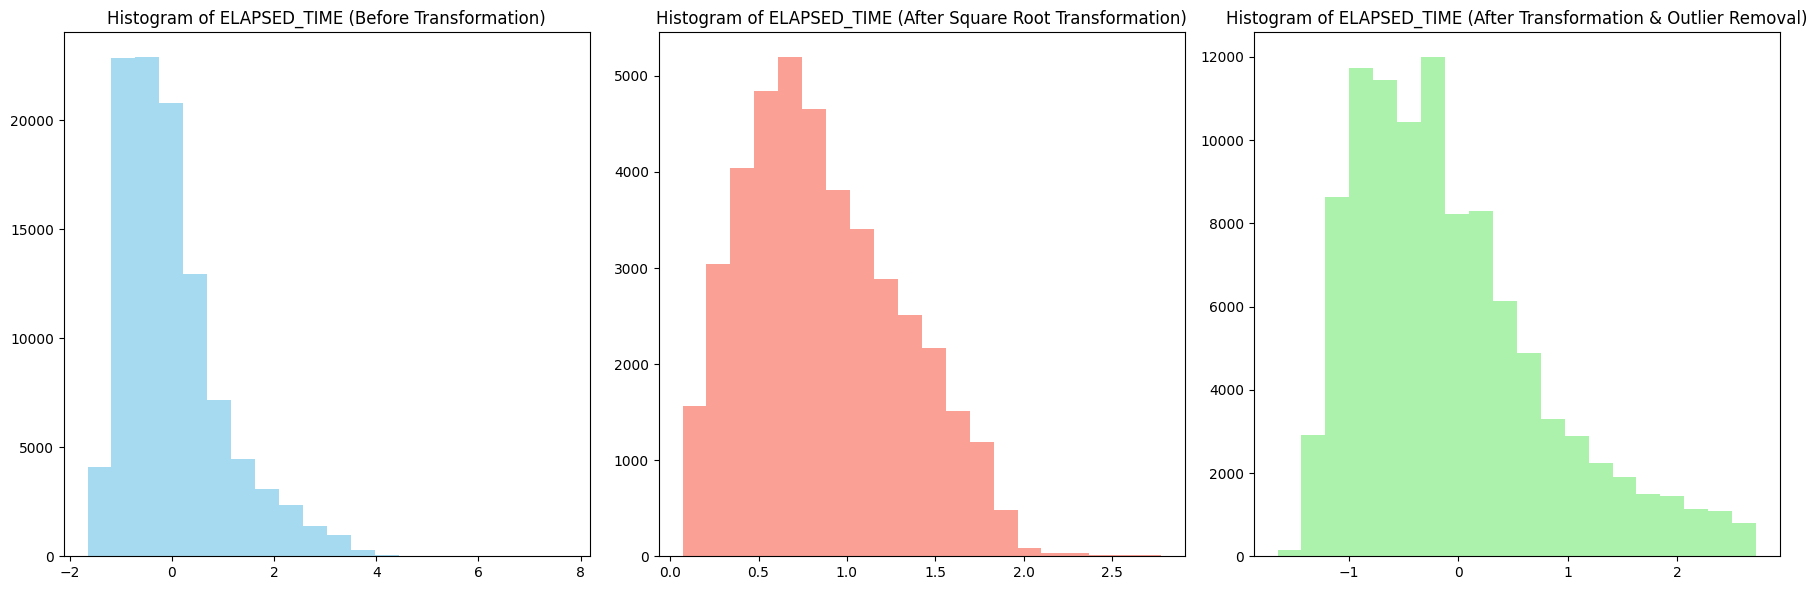

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


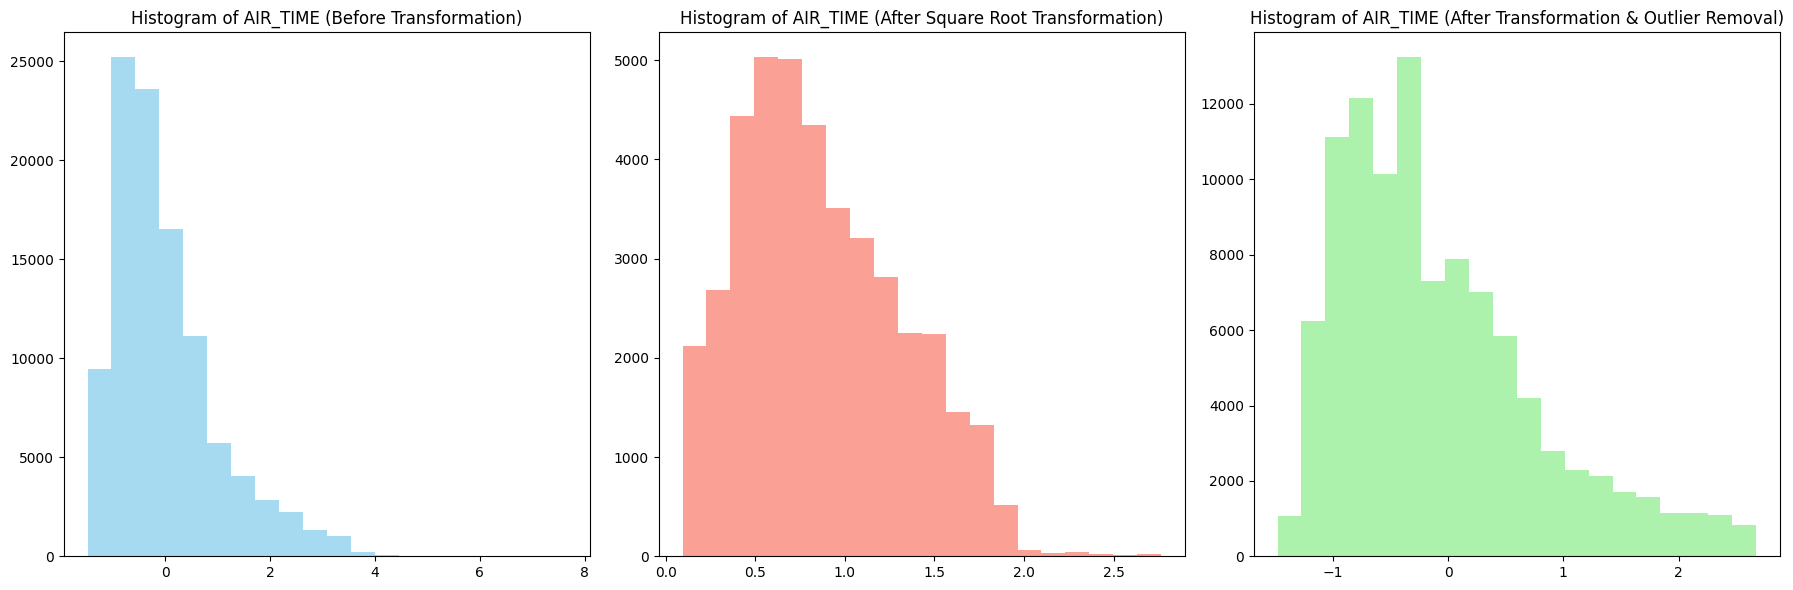

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


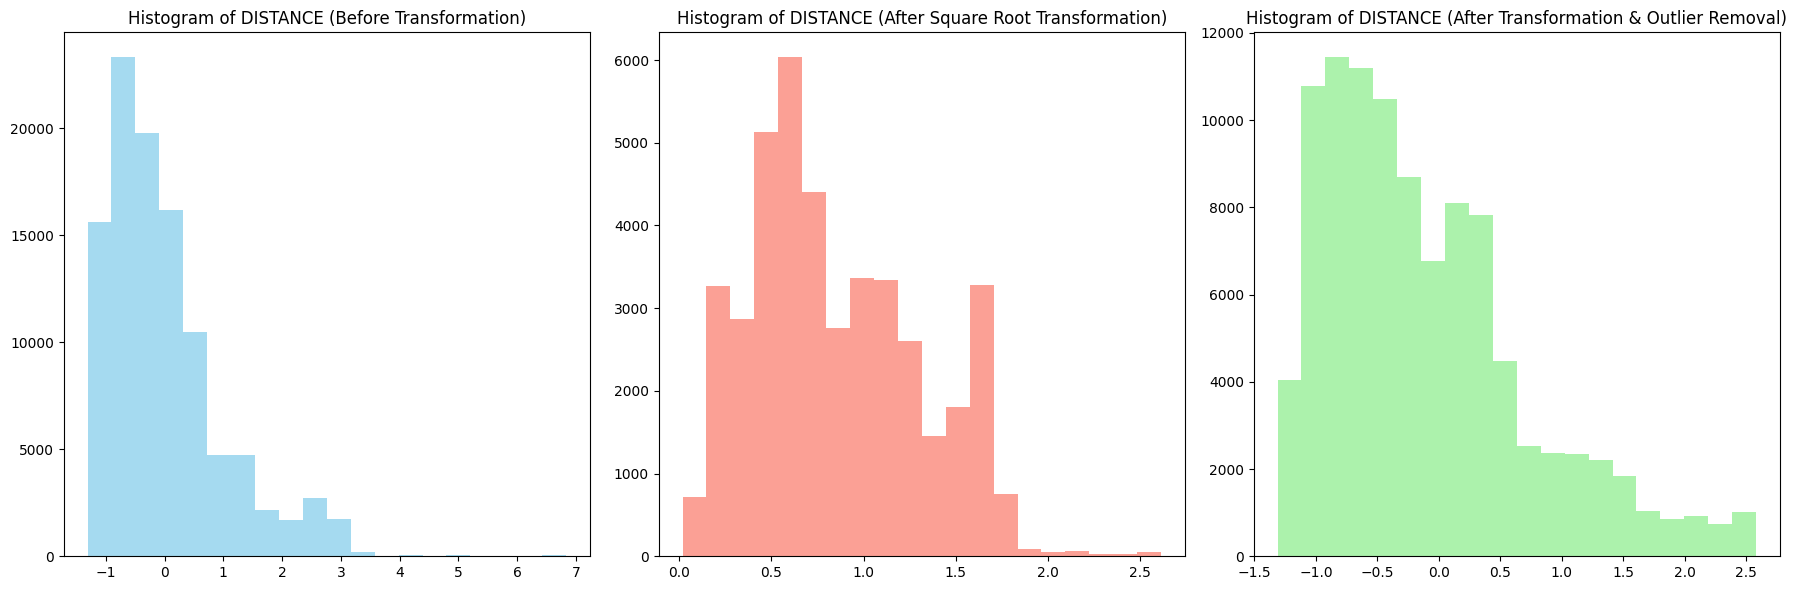

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, RobustScaler

# Define the list of continuous features
continuous_features = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT',
                       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE']

# Function to apply transformations, plot histograms, and remove outliers
def apply_transformations_and_plot(data, feature):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot 1: Histogram before transformation
    axes[0].hist(data[feature], bins=20, color='skyblue', alpha=0.75)
    axes[0].set_title(f'Histogram of {feature} (Before Transformation)')

    # Apply appropriate transformation based on feature distribution
    if data[feature].min() > 0:
        # Log transformation for right-skewed data
        transformed_data = np.log1p(data[feature])
        axes[1].hist(transformed_data, bins=20, color='salmon', alpha=0.75)
        axes[1].set_title(f'Histogram of {feature} (After Log Transformation)')
    else:
        # Square root transformation for non-negative data
        transformed_data = np.sqrt(data[feature])
        axes[1].hist(transformed_data, bins=20, color='salmon', alpha=0.75)
        axes[1].set_title(f'Histogram of {feature} (After Square Root Transformation)')

    # Apply RobustScaler to detect and remove outliers
    robust_scaler = RobustScaler()
    scaled_data = robust_scaler.fit_transform(data[[feature]])

    # Filter out outliers (scaled values with absolute score >= 2.5)
    filtered_data = data[np.abs(scaled_data.squeeze()) < 2.5]

    # Plot 3: Histogram after transformation and outlier removal
    axes[2].hist(filtered_data[feature], bins=20, color='lightgreen', alpha=0.75)
    axes[2].set_title(f'Histogram of {feature} (After Transformation & Outlier Removal)')

    plt.tight_layout()
    plt.show()

# Iterate over each continuous feature and apply transformations
for feature in continuous_features:
    try:
        apply_transformations_and_plot(cleaned_data, feature)
    except Exception as e:
        print(f"Error processing feature '{feature}': {e}")
